In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
dataset = pd.read_csv('dataset_cleaned.csv')
dataset.head()

Revenue                           Company Name  \
0                       NaN                               Facebook   
1        $10+ billion (USD)  Pacific Northwest National Laboratory   
2  Unknown / Non-Applicable             Juno College of Technology   
3  Unknown / Non-Applicable                               Facebook   
4        $10+ billion (USD)                               KesarWeb   

                     Sector                         Salary Estimate  \
0  Unknown / Non-Applicable           Employer Provided Salary:$60K   
1                    Retail   Employer Provided Salary:$91K - $145K   
2                Government  Employer Provided Salary:$109K - $173K   
3                 Education   Employer Provided Salary:$96 Per Hour   
4                    Retail           Employer Provided Salary:$90K   

               Location               Type of Ownership  \
0                Remote                     IT Services   
1          Richland, WA  Subsidiary or Business Segment   
2                Remote                      Government   
3                Remote        School / School District   
4  Point a la Hache, LA                Company - Public   

                            Industry  \
0             Information Technology   
1  General Merchandise & Superstores   
2                   Federal Agencies   
3        Education Training Services   
4  General Merchandise & Superstores   

                                   Job Title            Founded  Rating  \
0  Data Scientist, Analytics-Remote Presence  Company - Private     4.5   
1                             Data Scientist               1983     3.3   
2            Part-Time Content Creator, Data               1862     3.7   
3           Data Engineer, Product Analytics               2012     3.8   
4                         Jr. Data Scientist               1994     3.3   

                                     Job Description                   Size  \
0  Responsibilities:\n· Provides plan with data, ...  501 to 1000 Employees   
1  What you'll do...\nData Scientists in Walmart ...       10000+ Employees   
2  Duties\nSummary\nClick on "" button below to v...       10000+ Employees   
3  About the Position\nWe’ve been creating except...      1 to 50 Employees   
4  Data Scientists in Global Tech – Sam’s Technol...       10000+ Employees   

              parsed_sector parsed_salary  per_hour_salary_jobs  \
0  Unknown / Non-Applicable            60                     0   
1                    Retail      91 - 145                     0   
2                Government     109 - 173                     0   
3                 Education   96 per hour                     1   
4                    Retail            90                     0   

   fixed_salary_jobs  minimum_salary  annual_minimum_salary  maximum_salary  \
0                  1            60.0                60000.0            60.0   
1                  1            91.0                91000.0           145.0   
2                  1           109.0               109000.0           173.0   
3                  0            96.0               199680.0            96.0   
4                  1            90.0                90000.0            90.0   

   annual_maximum_salary  average_salary  states  \
0                60000.0         60000.0  Remote   
1               145000.0        118000.0      WA   
2               173000.0        141000.0  Remote   
3               199680.0        199680.0  Remote   
4                90000.0         90000.0      LA   

         parsed_type_of_ownership                           parsed_job_title  \
0                     IT Services  data scientist, analytics-remote presence   
1  Subsidiary or Business Segment                             data scientist   
2                      Government            part-time content creator, data   
3        School / School District           data engineer, product analytics   
4                Company - Public                      juni

In [4]:
dataset.columns

Index(['Revenue', 'Company Name', 'Sector', 'Salary Estimate', 'Location',
       'Type of Ownership', 'Industry', 'Job Title', 'Founded', 'Rating',
       'Job Description', 'Size', 'parsed_sector', 'parsed_salary',
       'per_hour_salary_jobs', 'fixed_salary_jobs', 'minimum_salary',
       'annual_minimum_salary', 'maximum_salary', 'annual_maximum_salary',
       'average_salary', 'states', 'parsed_type_of_ownership',
       'parsed_job_title', 'parsed_founded', 'parsed_job_description',
       'description_length'],
      dtype='object')

In [5]:
df = dataset[['Revenue', 'Company Name', 'parsed_sector', 'states', 'parsed_type_of_ownership', 'Industry', 'parsed_job_title', 'parsed_founded', 'Rating', 'description_length', 'Size', 'per_hour_salary_jobs', 'fixed_salary_jobs', 'average_salary']]
print(df.shape)
df.head()

(3975, 14)


Revenue                           Company Name  \
0                       NaN                               Facebook   
1        $10+ billion (USD)  Pacific Northwest National Laboratory   
2  Unknown / Non-Applicable             Juno College of Technology   
3  Unknown / Non-Applicable                               Facebook   
4        $10+ billion (USD)                               KesarWeb   

              parsed_sector  states        parsed_type_of_ownership  \
0  Unknown / Non-Applicable  Remote                     IT Services   
1                    Retail      WA  Subsidiary or Business Segment   
2                Government  Remote                      Government   
3                 Education  Remote        School / School District   
4                    Retail      LA                Company - Public   

                            Industry  \
0             Information Technology   
1  General Merchandise & Superstores   
2                   Federal Agencies   
3        Education Training Services   
4  General Merchandise & Superstores   

                            parsed_job_title  parsed_founded  Rating  \
0  data scientist, analytics-remote presence             NaN     4.5   
1                             data scientist          1983.0     3.3   
2            part-time content creator, data          1862.0     3.7   
3           data engineer, product analytics          2012.0     3.8   
4                      junior data scientist          1994.0     3.3   

   description_length                   Size  per_hour_salary_jobs  \
0                 501  501 to 1000 Employees                     0   
1                 914       10000+ Employees                     0   
2                 633       10000+ Employees                     0   
3                1122      1 to 50 Employees                     1   
4                 977       10000+ Employees                     0   

   fixed_salary_jobs  average_salary  
0                  1         60000.0  
1                  1        118000.0  
2                  1        141000.0  
3                  0        199680.0  
4                  1         90000.0

# Barplots

In [6]:
def plot_barplot(dataset, x_axis, y_axis, annotations = True, bar_width = 30, bar_height = 75, annotation_size=12):
    
    if len(dataset[x_axis].unique()) < 25 :
        sns.set(rc = {'figure.figsize':(15, 8)}) 
    elif (len(dataset[x_axis].unique()) >= 25) and (len(dataset[x_axis].unique()) < 35):
        sns.set(rc={'figure.figsize':(bar_width, bar_height)})
    
    # Plotting barplot
    plots = sns.barplot(data=dataset, x=x_axis, y=y_axis)
    
    if annotations:
        for bar in plots.patches:
            plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',size=annotation_size, xytext=(10, 30), textcoords='offset points', color='red', rotation=90)
        
        
#         print((bar.get_x(), bar.get_width(), bar.get_height()))
    
    plt.xticks(rotation=90)
    plt.show()
    
def plot_barplot_hue(dataset, x_axis, y_axis, hue_name, annotations=True, bar_width = 30, bar_height = 75, annotation_size=12):
    
    if len(dataset[x_axis].unique()) < 25 :
        sns.set(rc = {'figure.figsize':(15, 8)})
    elif (len(dataset[x_axis].unique()) >= 25) and (len(dataset[x_axis].unique()) < 35):
        sns.set(rc={'figure.figsize':(bar_width, bar_height)})
   
    # CHECK THIS
    if((len(dataset[x_axis].unique()) * len(dataset[hue_name].unique())) > 30 ):
        sns.set(rc={'figure.figsize':(30, 14)})
        
        
        
    plots = sns.barplot(data=dataset, x=x_axis, y=y_axis, hue=hue_name)
    
    if annotations:
        for bar in plots.patches:
            plots.annotate(format(bar.get_height(), '.2f'),
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',size=annotation_size, xytext=(10, 30), textcoords='offset points', color='red', rotation=90)
    
    
    
    plt.xticks(rotation=90)
    plt.show()

def plot_multiple_barplots_with_hue(dataset, column_name, y_axis, hue_name, annotations = True, bar_width = 30, bar_height = 75, annotation_size=12, rotation=90, annotation_xaxis = 10):
    
    print("We have {} unique values in the given feature:{}  \nDivide rows and columns:(Recommended 'Equally') ".format(len(dataset[column_name].unique()), column_name))

    n_rows = int(input("How many rows: ")) 
    n_cols = int(input("How many columns: "))


    if n_rows < n_cols:
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(35, 15))
    elif n_rows > n_cols:
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(bar_width, bar_height))
    else:
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(bar_width, bar_height))

    category_name = dataset[column_name].unique()
    z = 0

    for i in range(n_rows): 
        for j in range(n_cols):
            try:
                partial_data = dataset[dataset[column_name] == category_name[z]]
                plots = sns.barplot(ax=axes[i, j], data=partial_data, x = column_name, y = y_axis, hue = hue_name, palette=np.random.choice(colorid, size=len(df[hue_name].unique())))
                
                if annotations:
                    plots.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5), loc='best')
                    for bar in plots.patches:
                        plots.annotate(format(bar.get_height(), '.2f'),
                                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom',size=annotation_size, xytext=(annotation_xaxis, 10), textcoords='offset points', color='red', rotation=rotation)
                
                
            except:
                plt.axis('off')
#                 axes[i, j].text(0.5, 0.5, s='EMPTY PLOT/ERROR OCCURED', fontsize=18, ha='center')
            z+=1
            



In [7]:
# Different types of colors.
import matplotlib

colorname = []
colorid = []

for name, hex in matplotlib.colors.cnames.items():
    colorname.append(name)
    colorid.append(hex)

zippedcolors = list(zip(colorname, colorid))
# zippedcolors = sorted(zippedcolors, key=lambda x: x[1])

In [8]:
df.columns

Index(['Revenue', 'Company Name', 'parsed_sector', 'states',
       'parsed_type_of_ownership', 'Industry', 'parsed_job_title',
       'parsed_founded', 'Rating', 'description_length', 'Size',
       'per_hour_salary_jobs', 'fixed_salary_jobs', 'average_salary'],
      dtype='object')

### Revenue

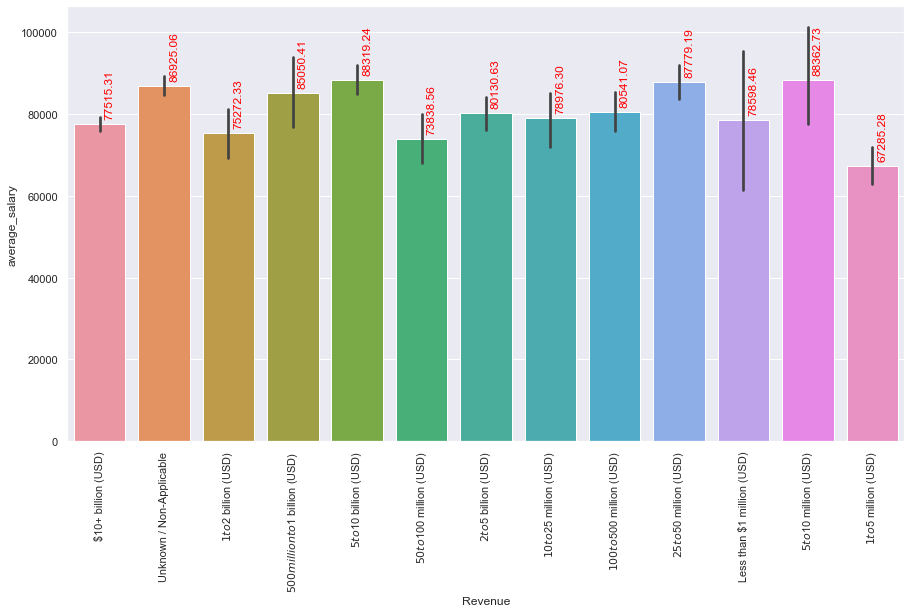

In [9]:
plot_barplot(df, 'Revenue', 'average_salary')

We have 14 unique values in the given feature:Revenue  
Divide rows and columns:(Recommended 'Equally') 
How many rows: 7
How many columns: 2


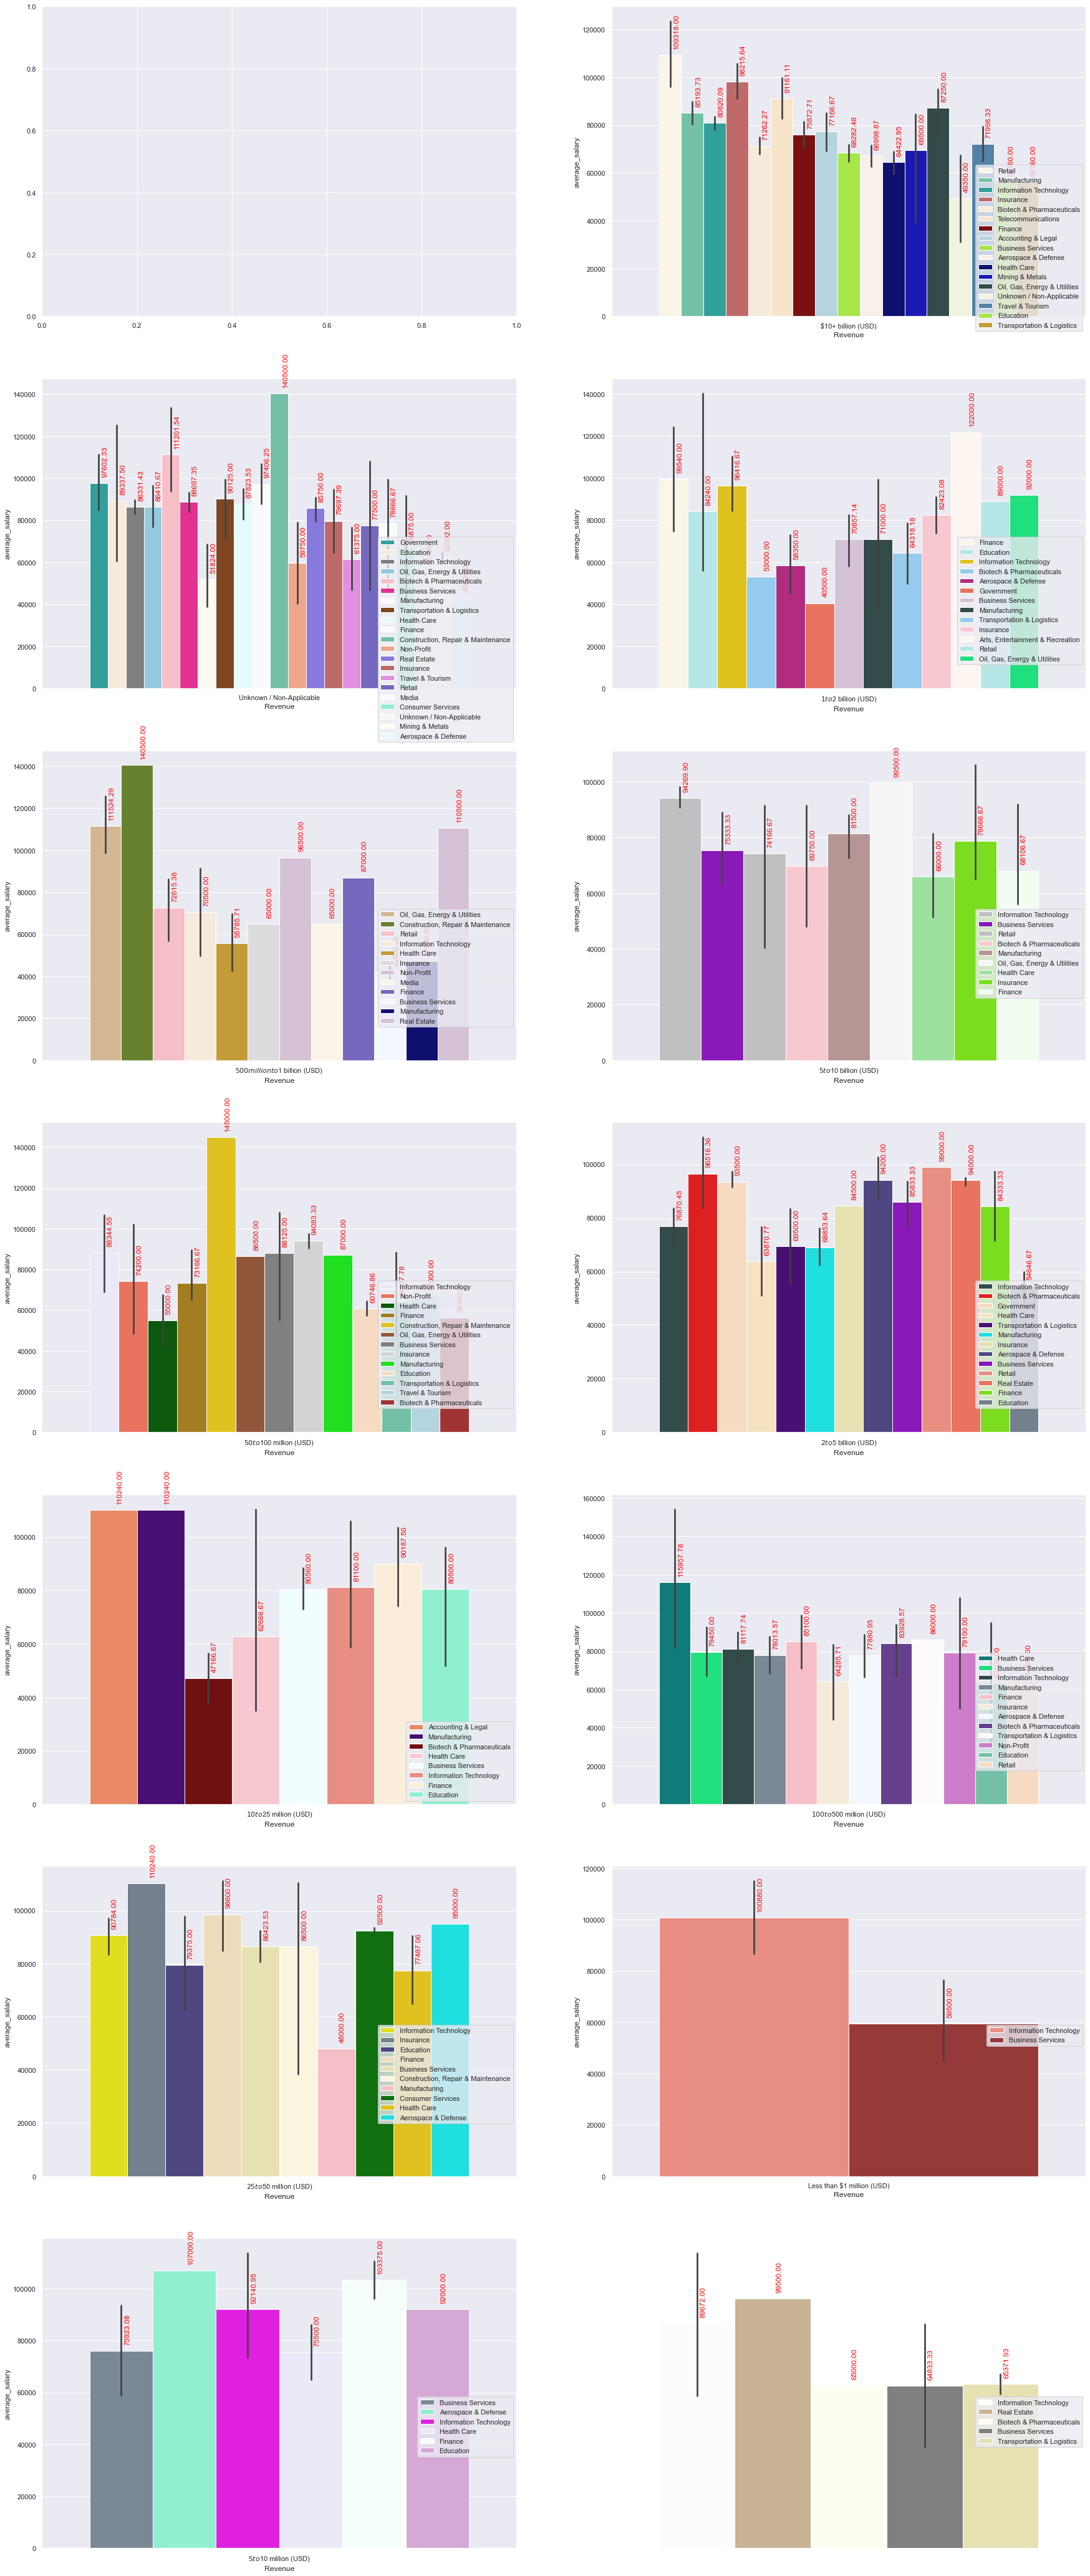

In [10]:
plot_multiple_barplots_with_hue(df, 'Revenue', 'average_salary', 'parsed_sector', annotations=True)

We have 14 unique values in the given feature:Revenue  
Divide rows and columns:(Recommended 'Equally') 
How many rows: 7
How many columns: 2


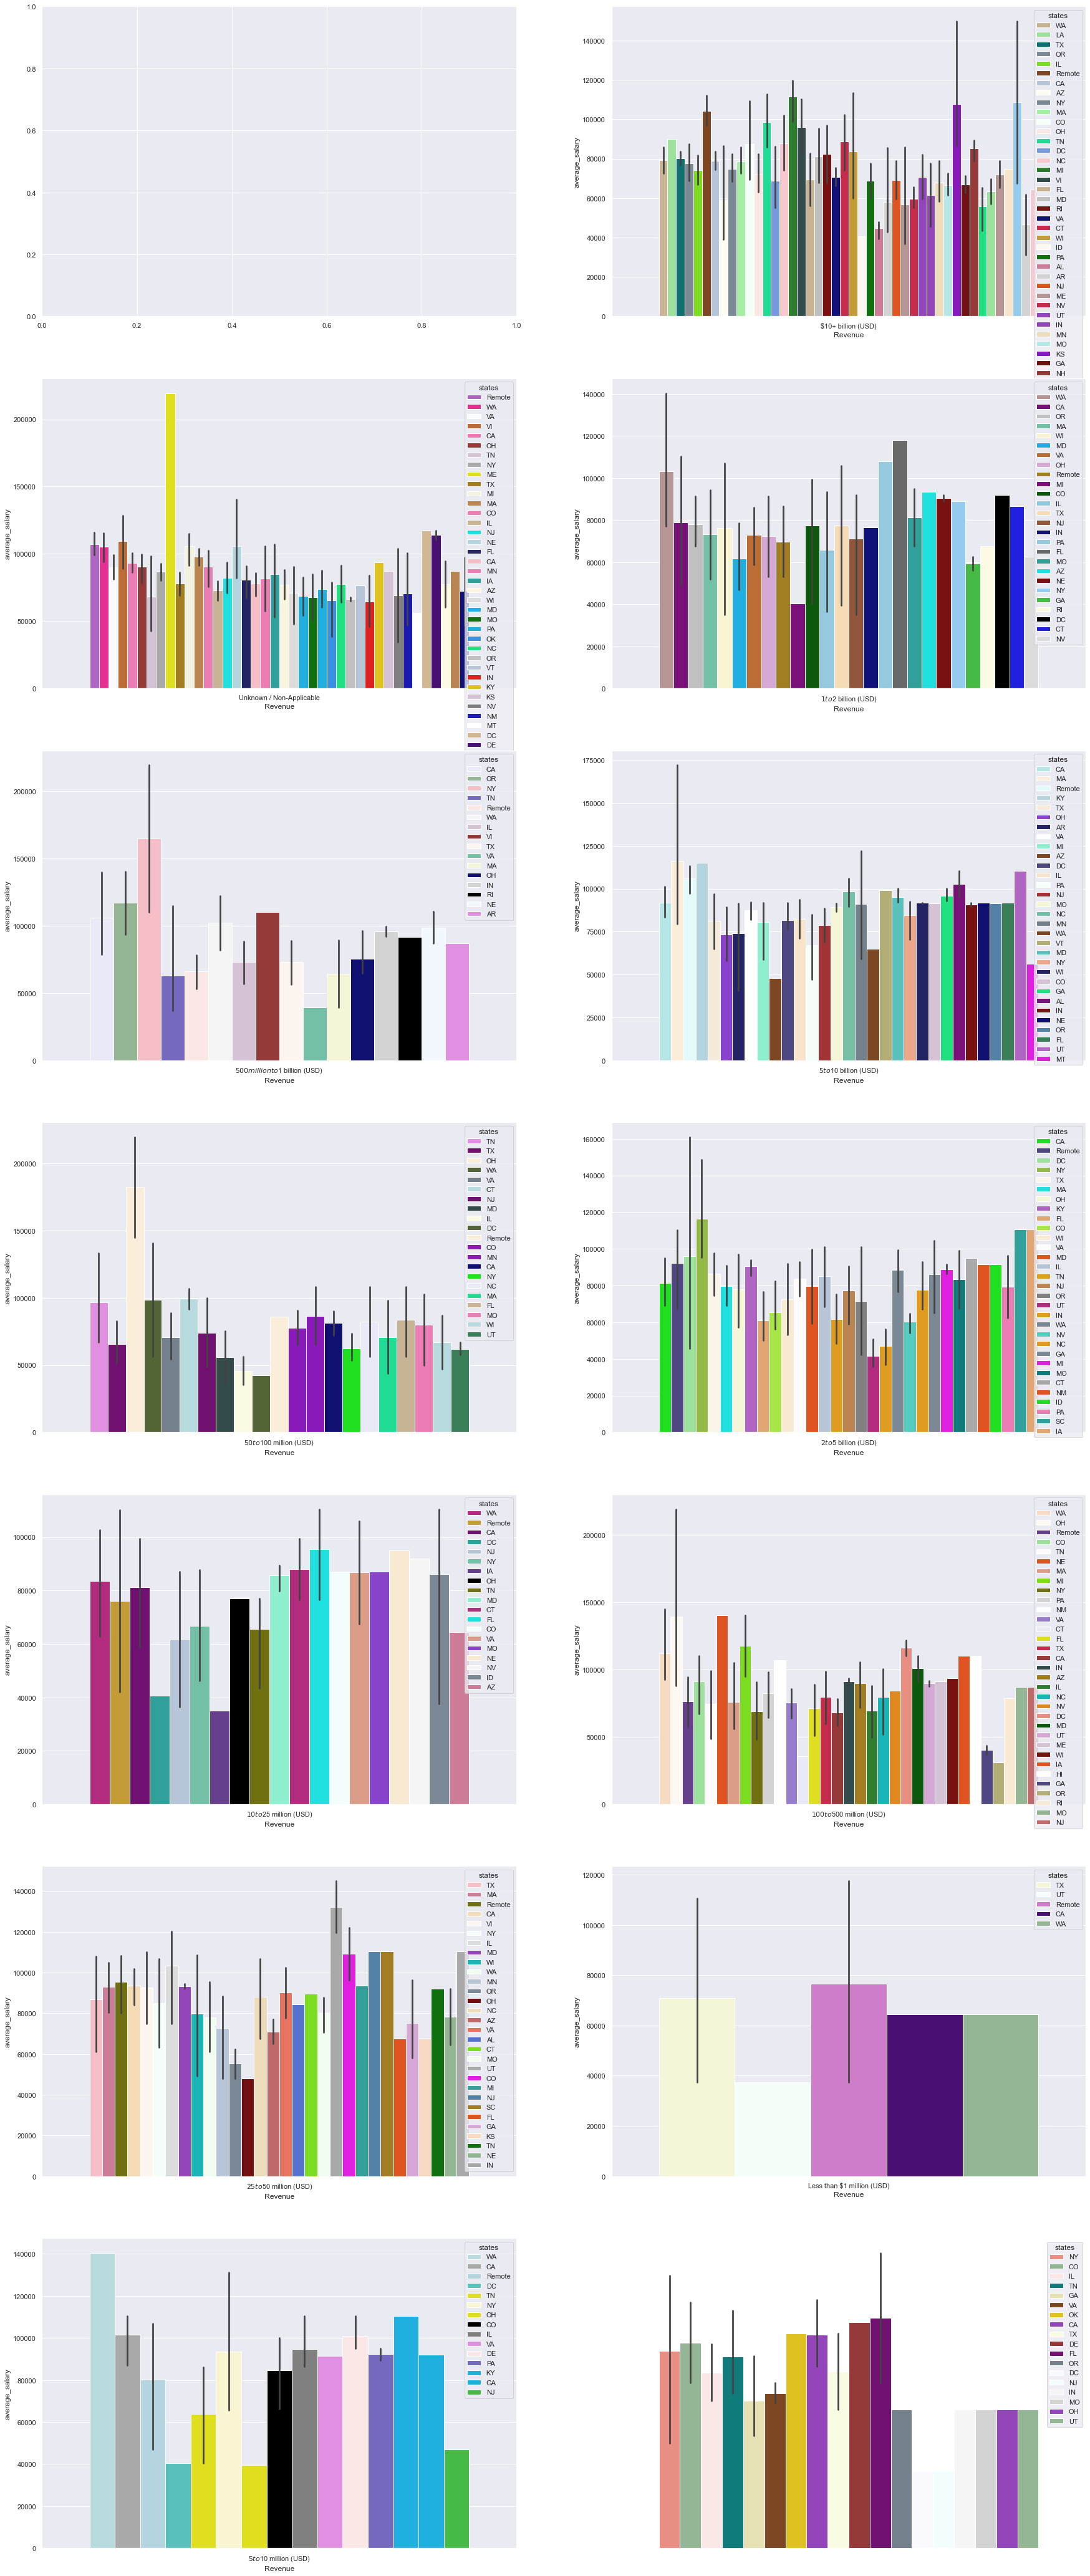

In [11]:
plot_multiple_barplots_with_hue(df, 'Revenue', 'average_salary', 'states', annotations=False)

We have 14 unique values in the given feature:Revenue  
Divide rows and columns:(Recommended 'Equally') 
How many rows: 5
How many columns: 3


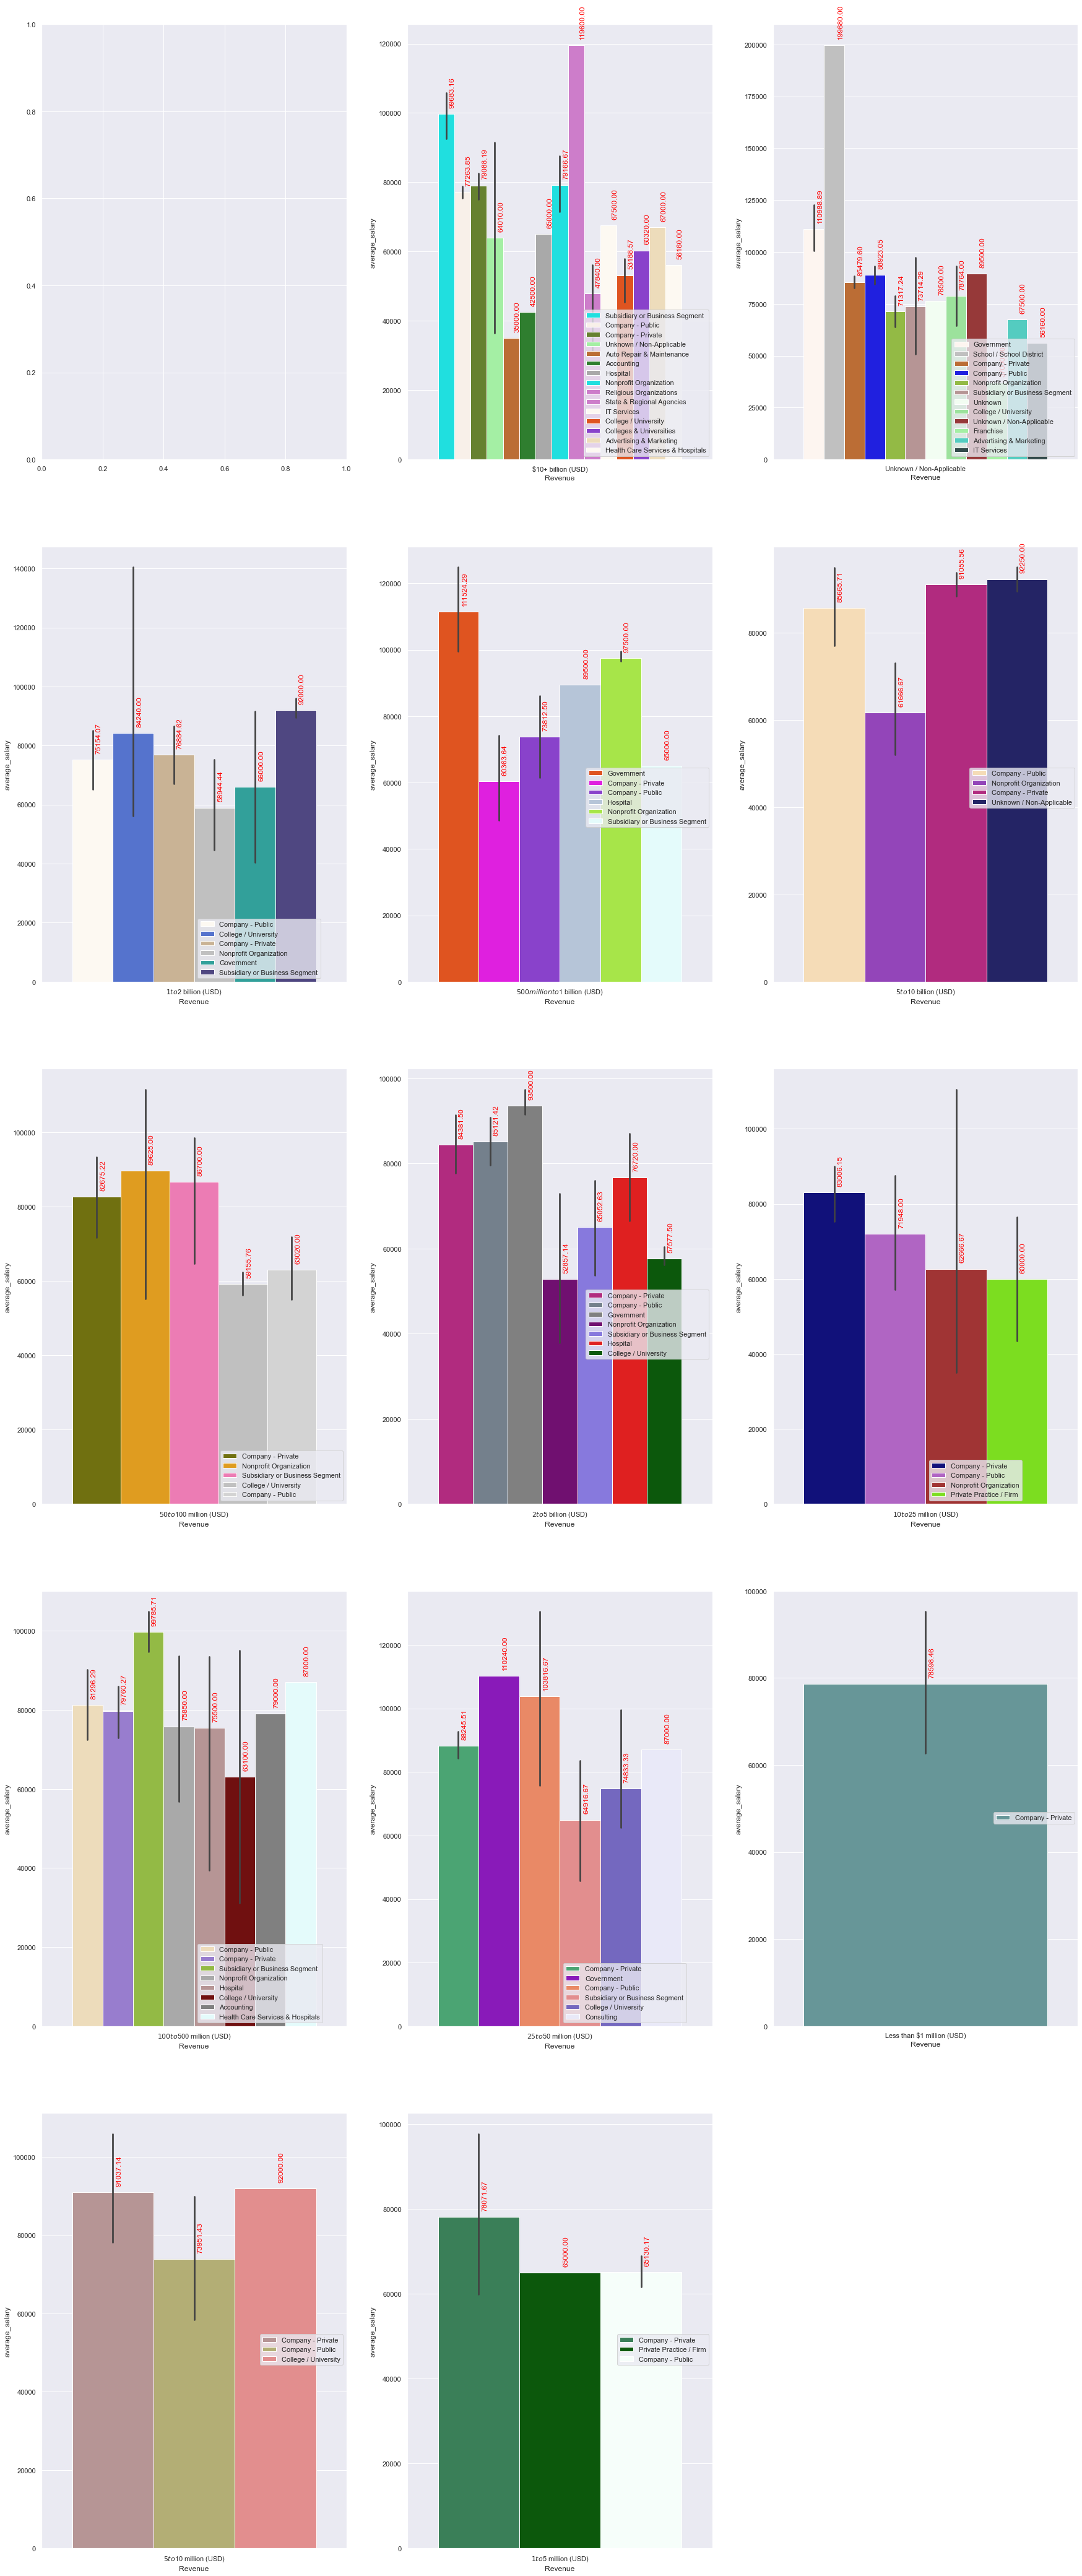

In [12]:
plot_multiple_barplots_with_hue(df, 'Revenue', 'average_salary', 'parsed_type_of_ownership', annotations=True)

We have 14 unique values in the given feature:Revenue  
Divide rows and columns:(Recommended 'Equally') 
How many rows: 7
How many columns: 2


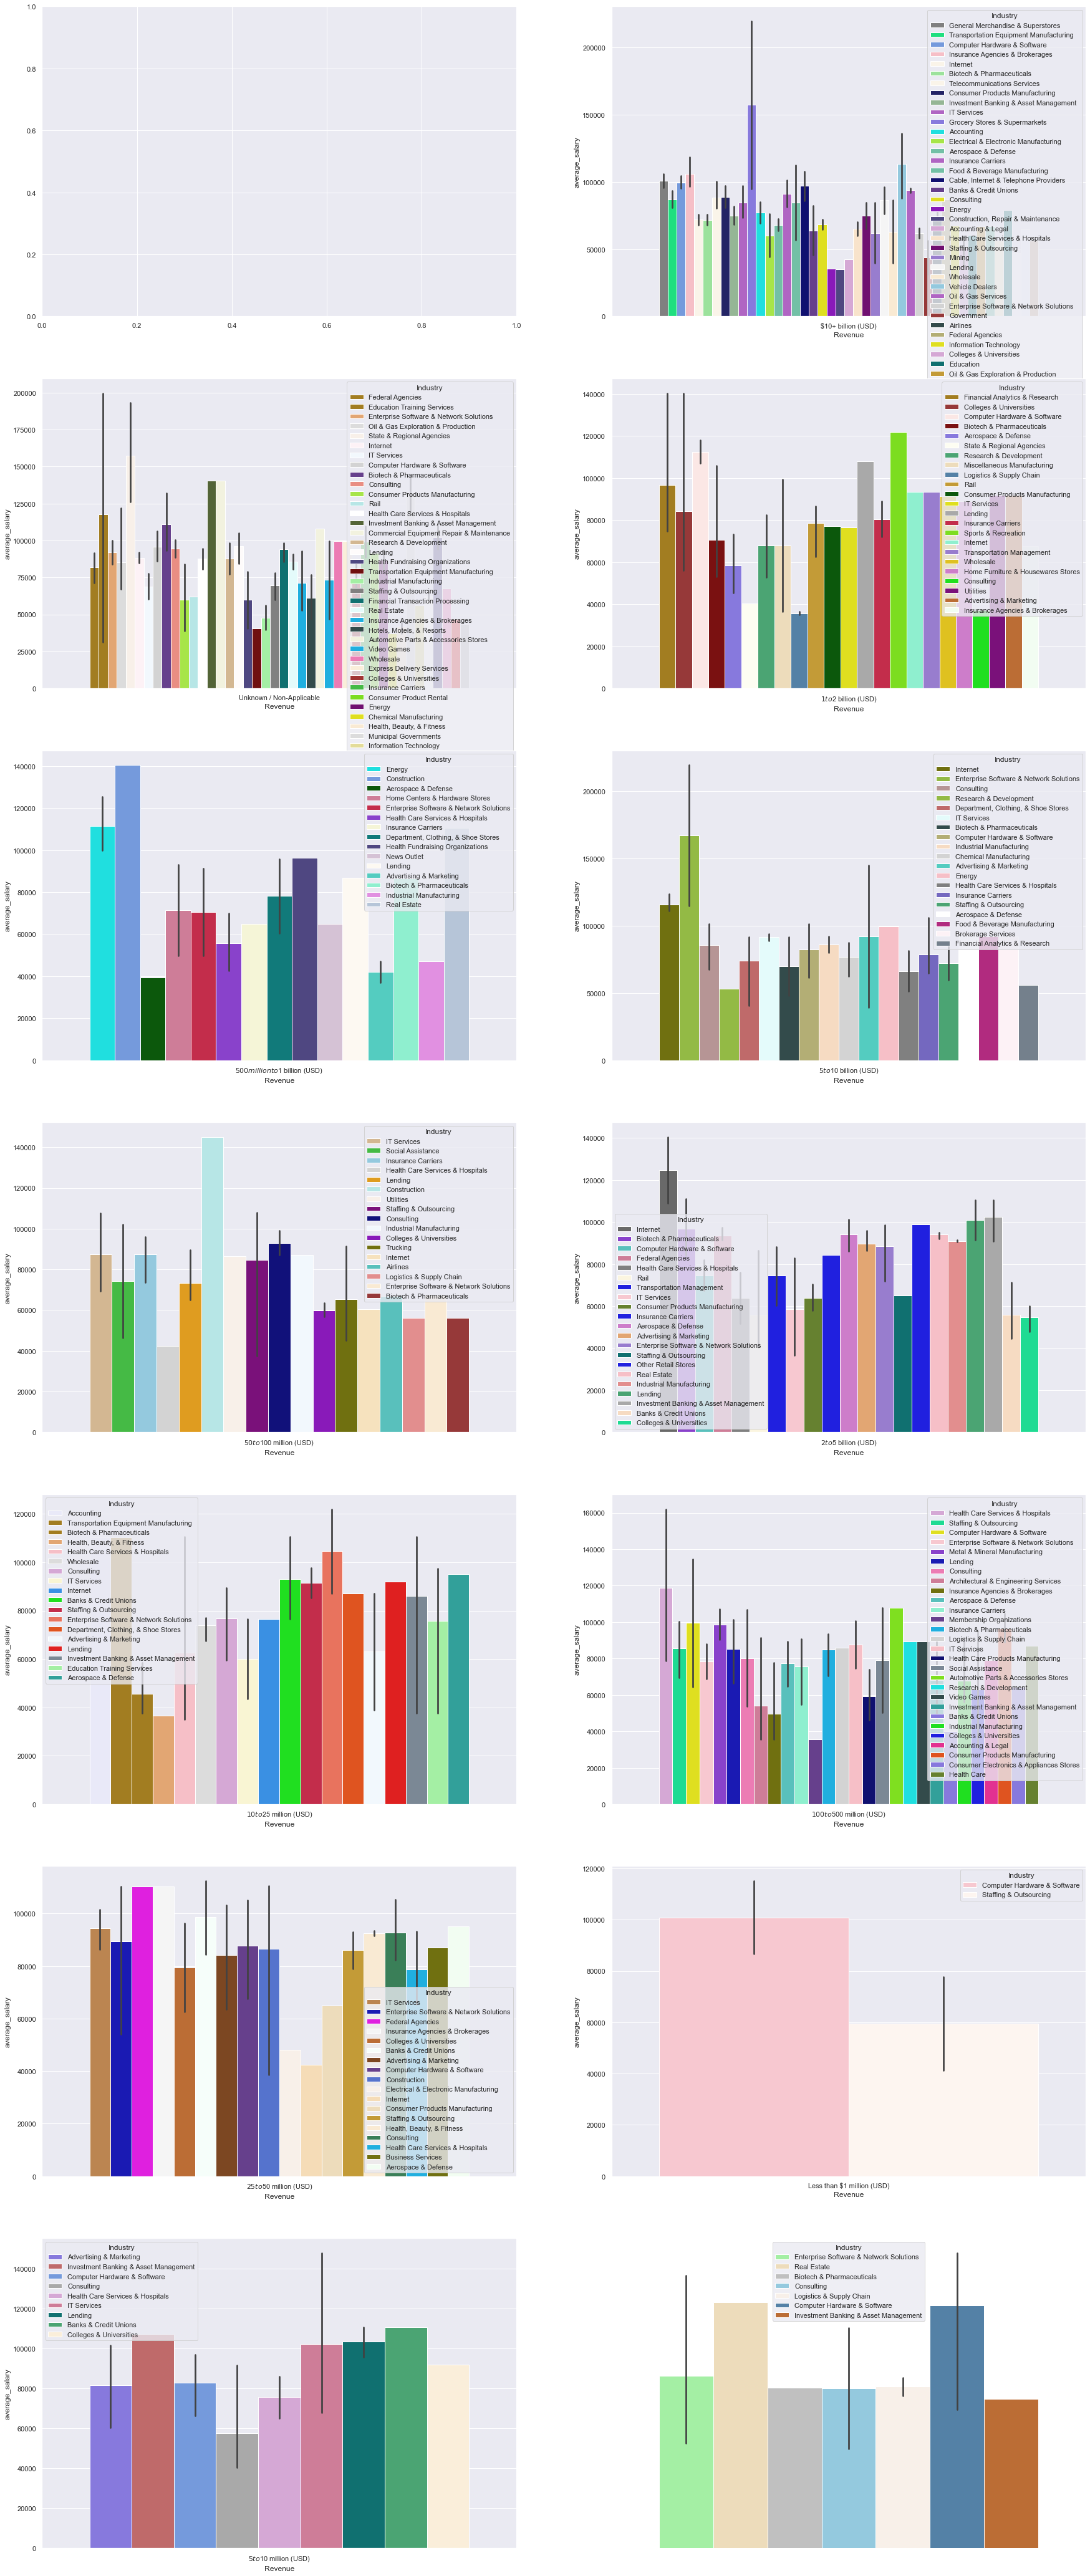

In [13]:
plot_multiple_barplots_with_hue(dataset=df, column_name='Revenue', y_axis='average_salary', hue_name='Industry', annotations=False)

We have 14 unique values in the given feature:Revenue  
Divide rows and columns:(Recommended 'Equally') 
How many rows: 7
How many columns: 2


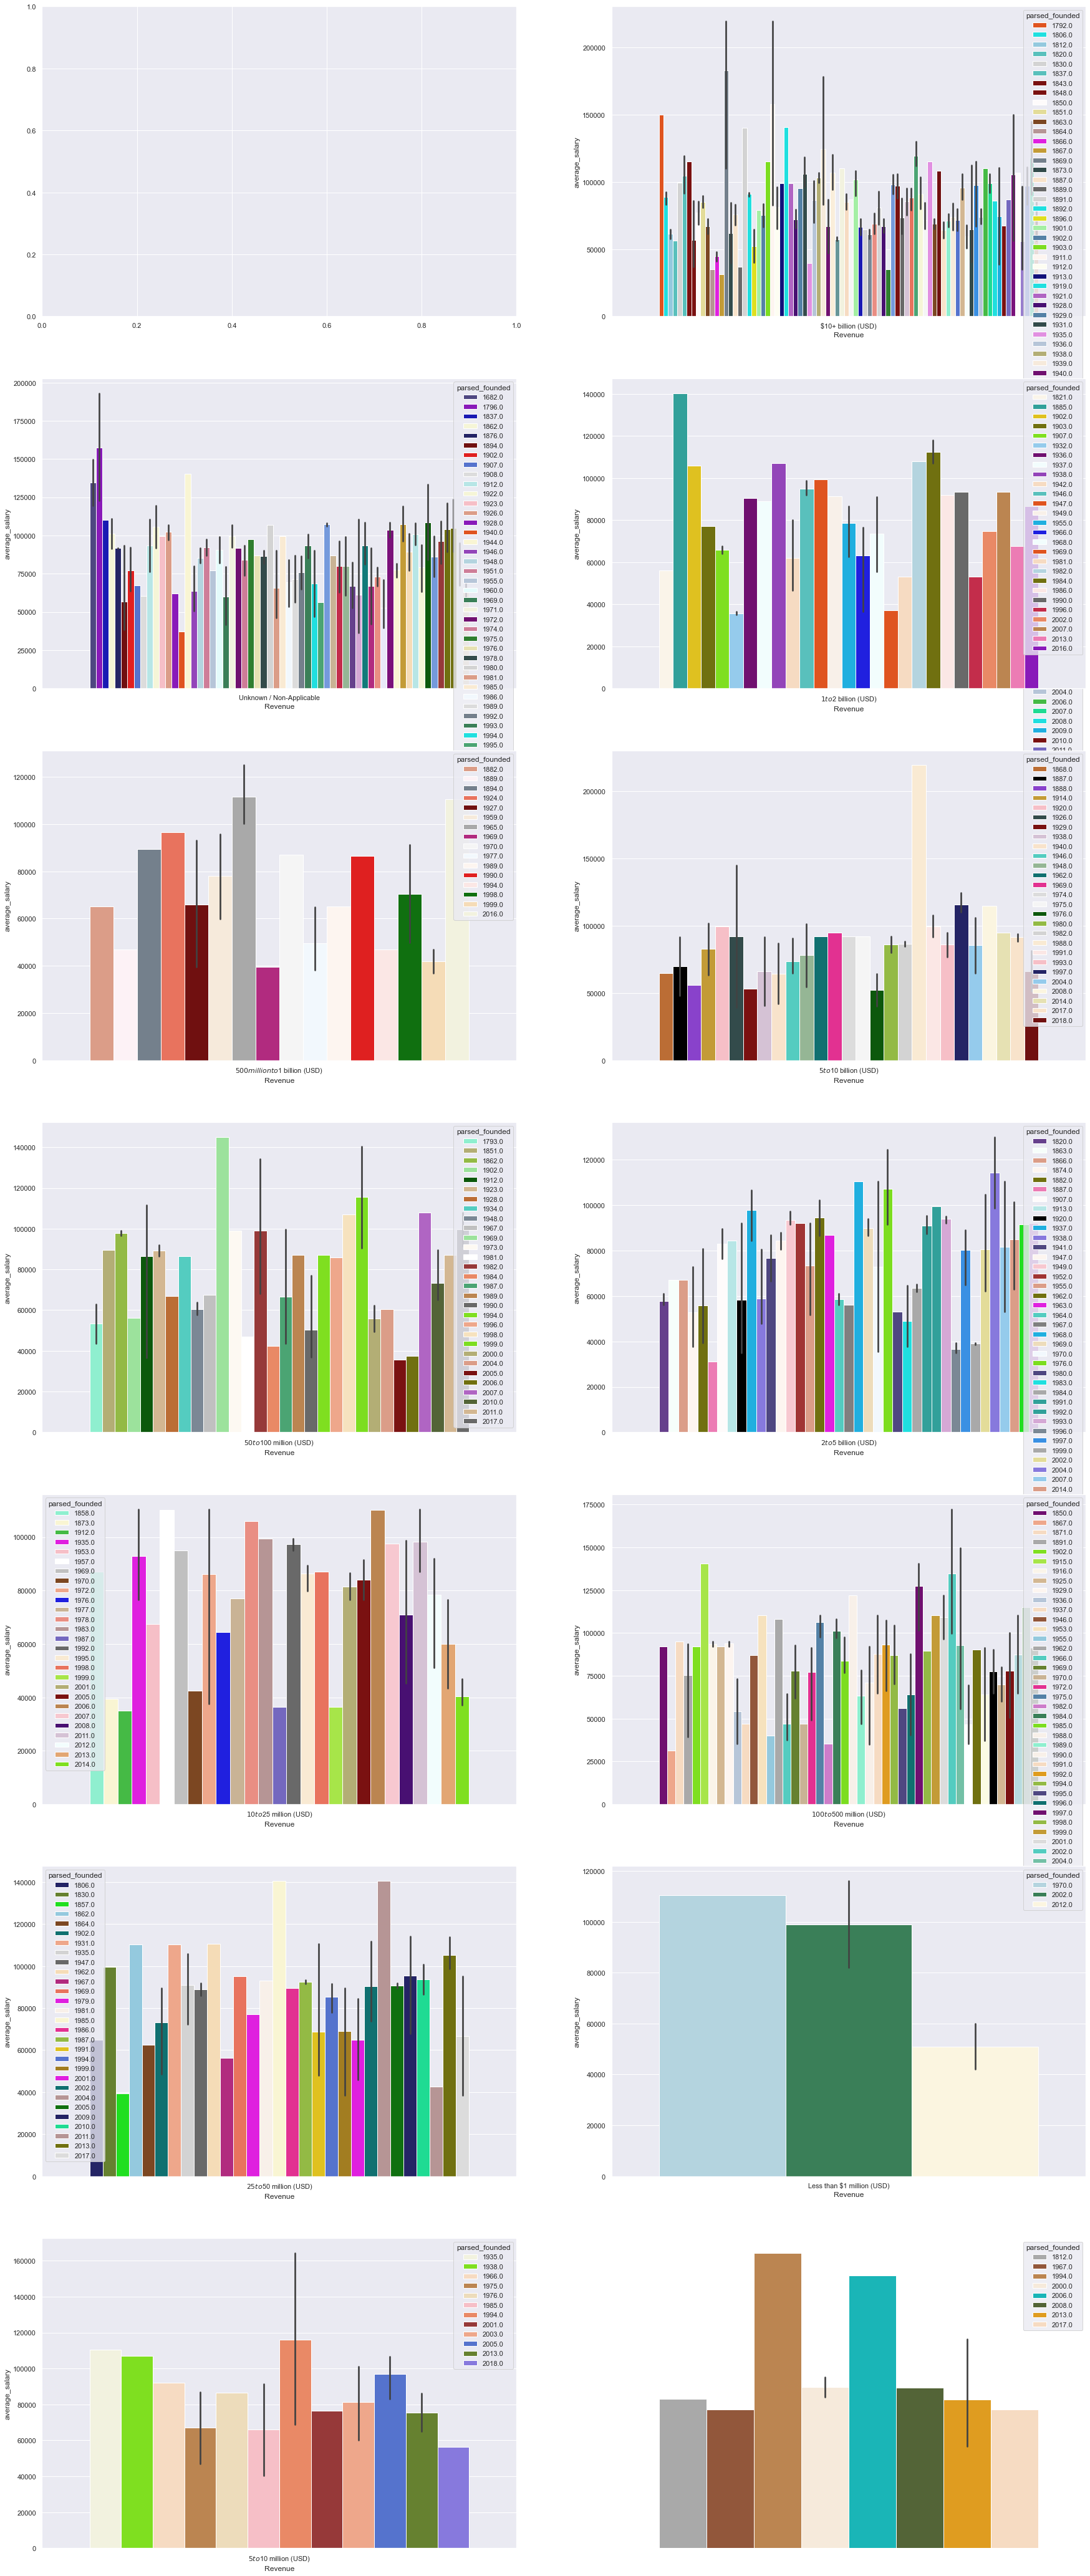

In [14]:
plot_multiple_barplots_with_hue(df, 'Revenue', 'average_salary', 'parsed_founded', annotations=False)

We have 14 unique values in the given feature:Revenue  
Divide rows and columns:(Recommended 'Equally') 
How many rows: 4
How many columns: 4


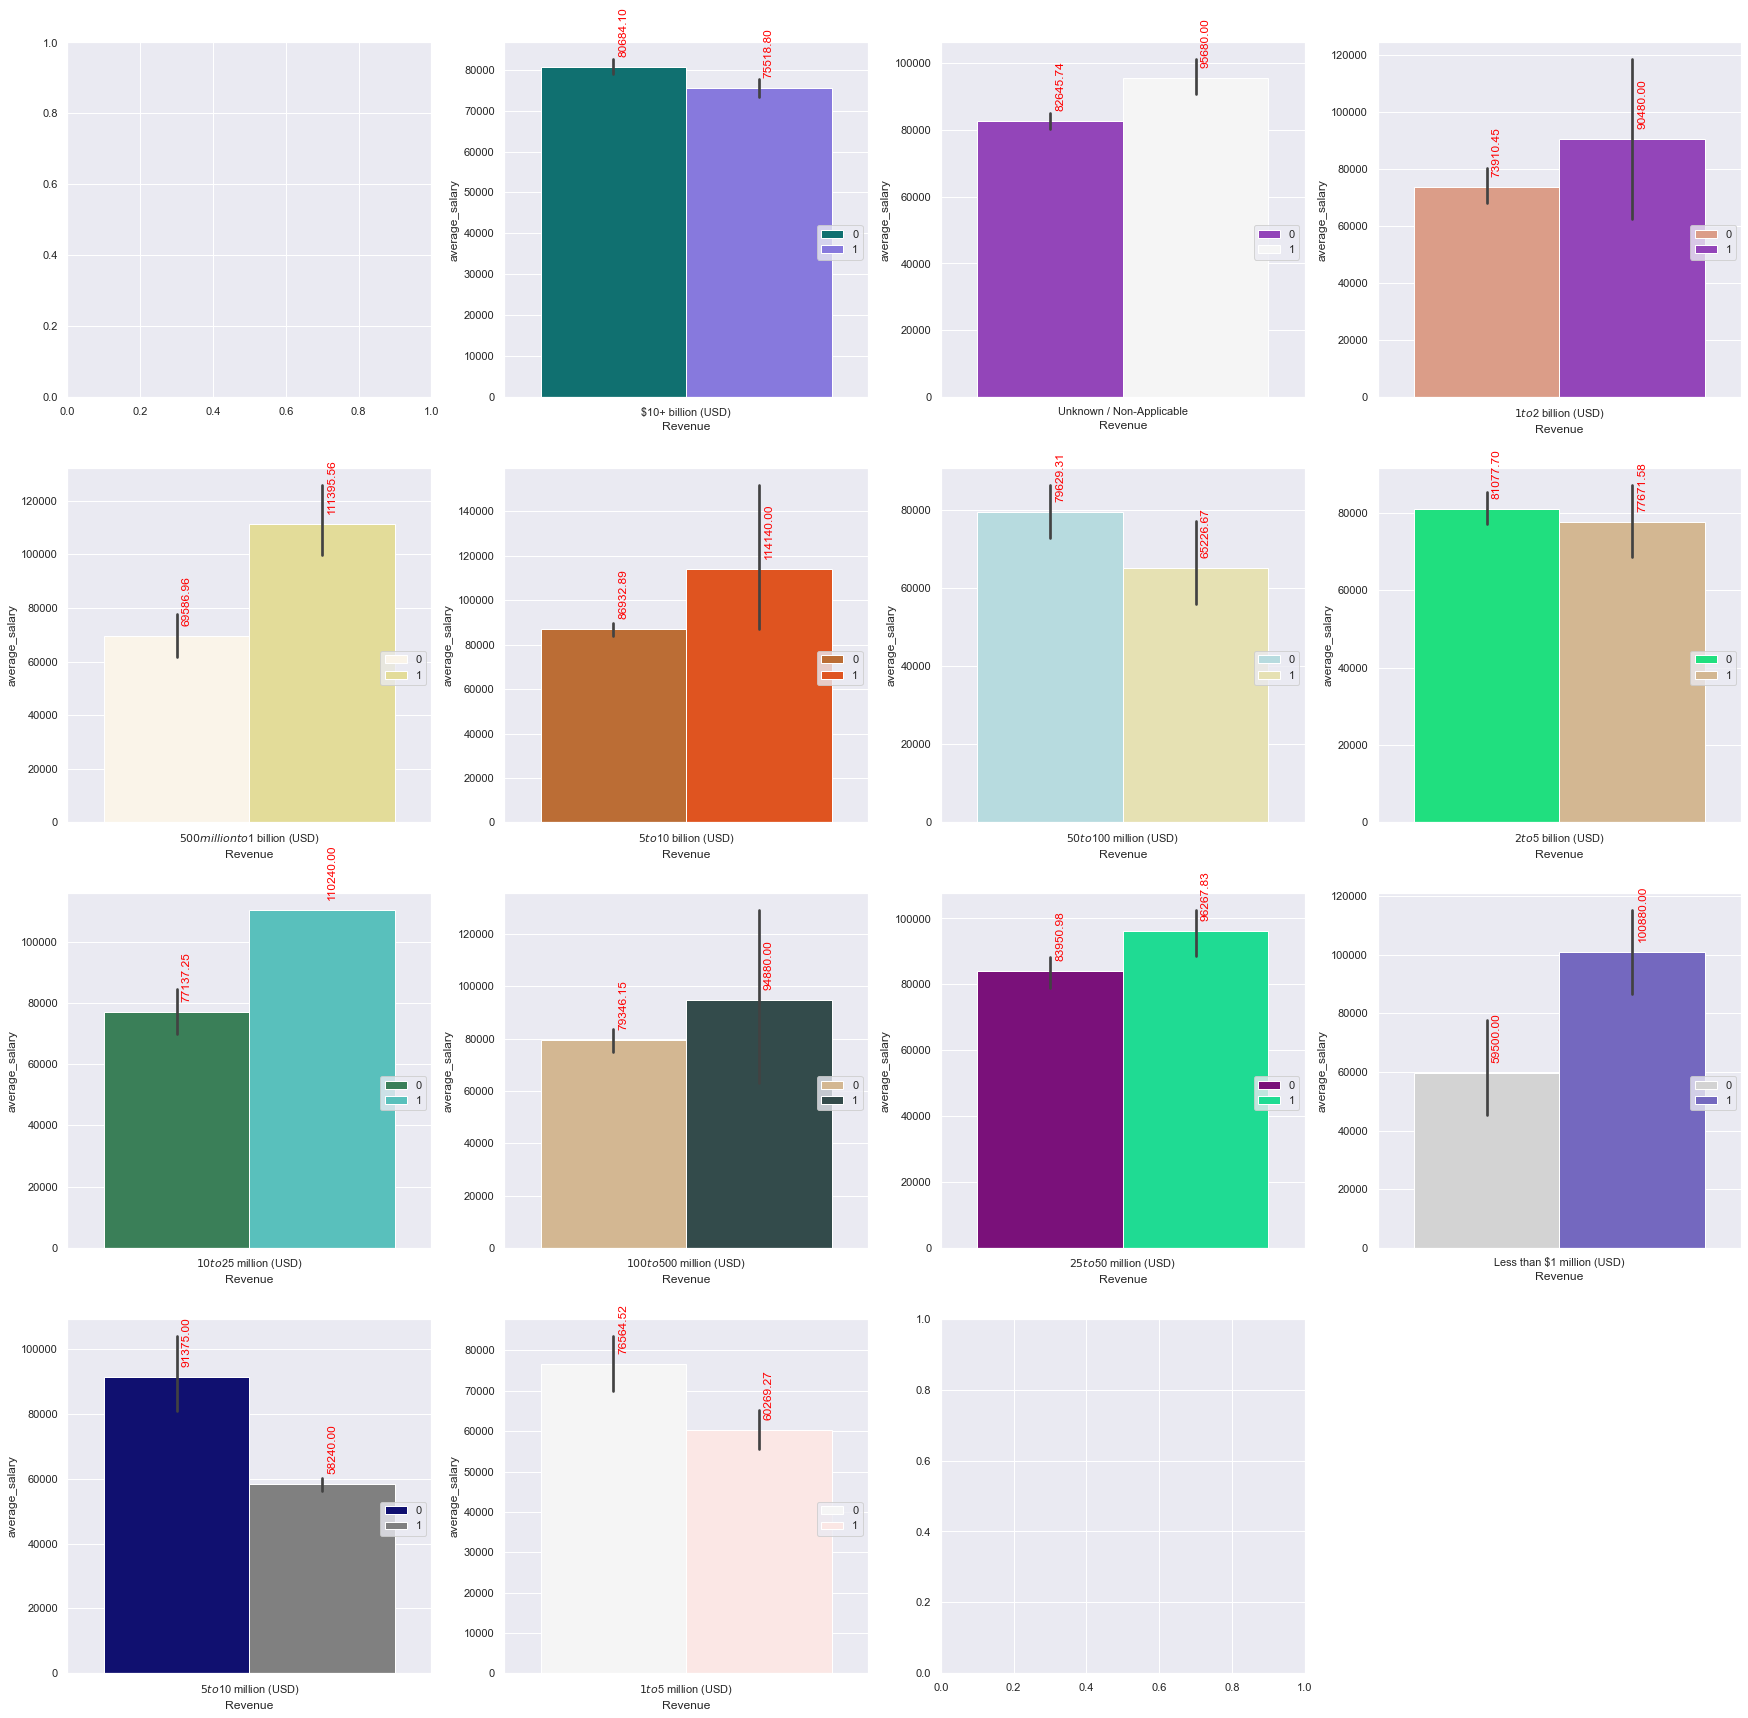

In [15]:
plot_multiple_barplots_with_hue(df, column_name='Revenue', y_axis='average_salary', hue_name='per_hour_salary_jobs', bar_width=30, bar_height=30)

### Sector

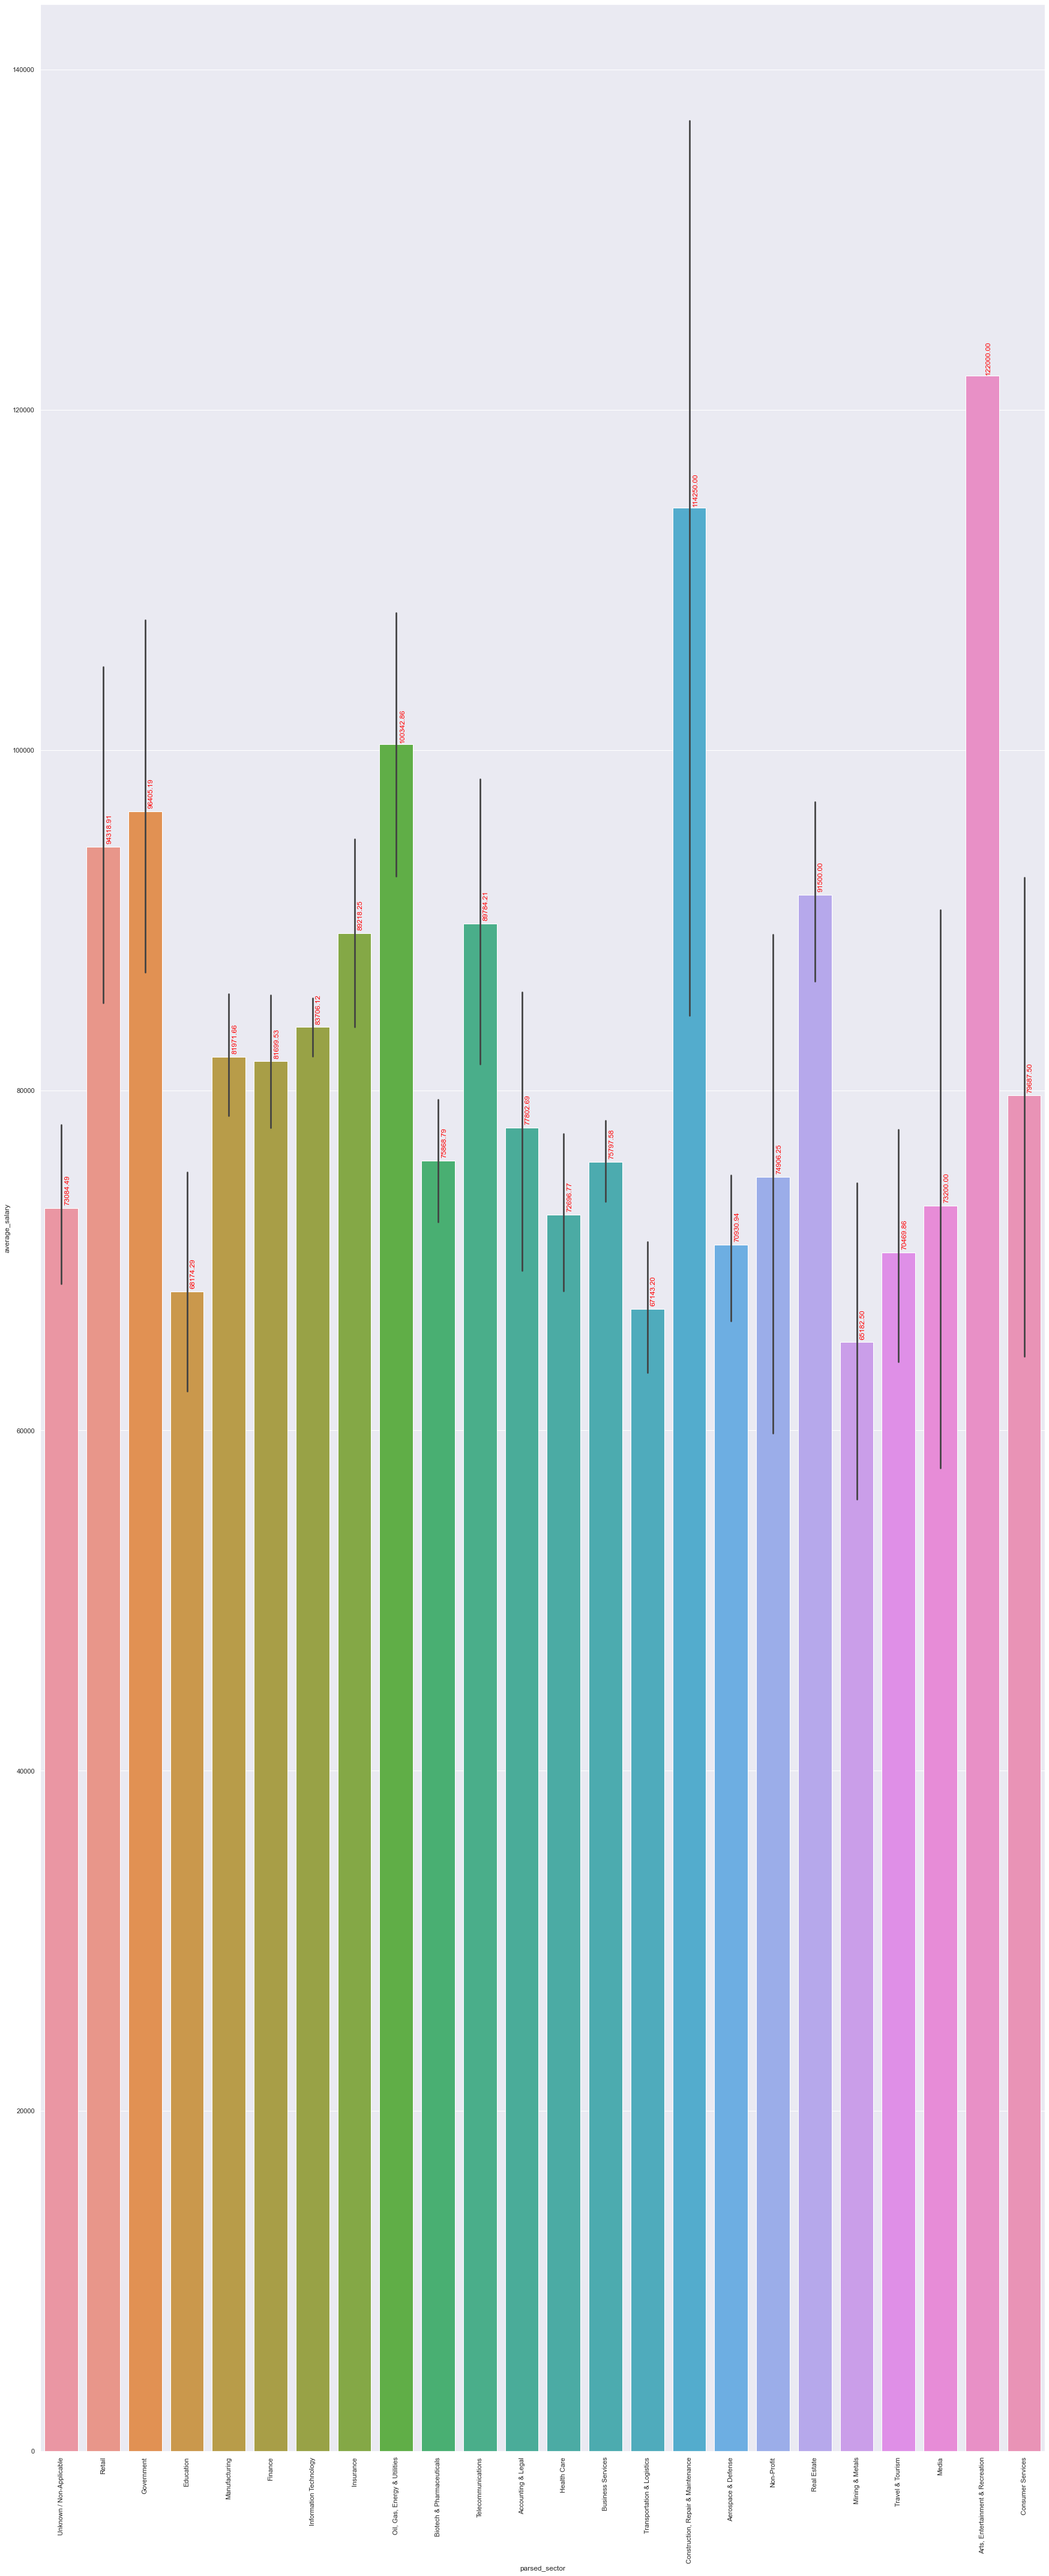

In [16]:
plot_barplot(df, 'parsed_sector', 'average_salary')

We have 25 unique values in the given feature:parsed_sector  
Divide rows and columns:(Recommended 'Equally') 
How many rows: 7
How many columns: 4


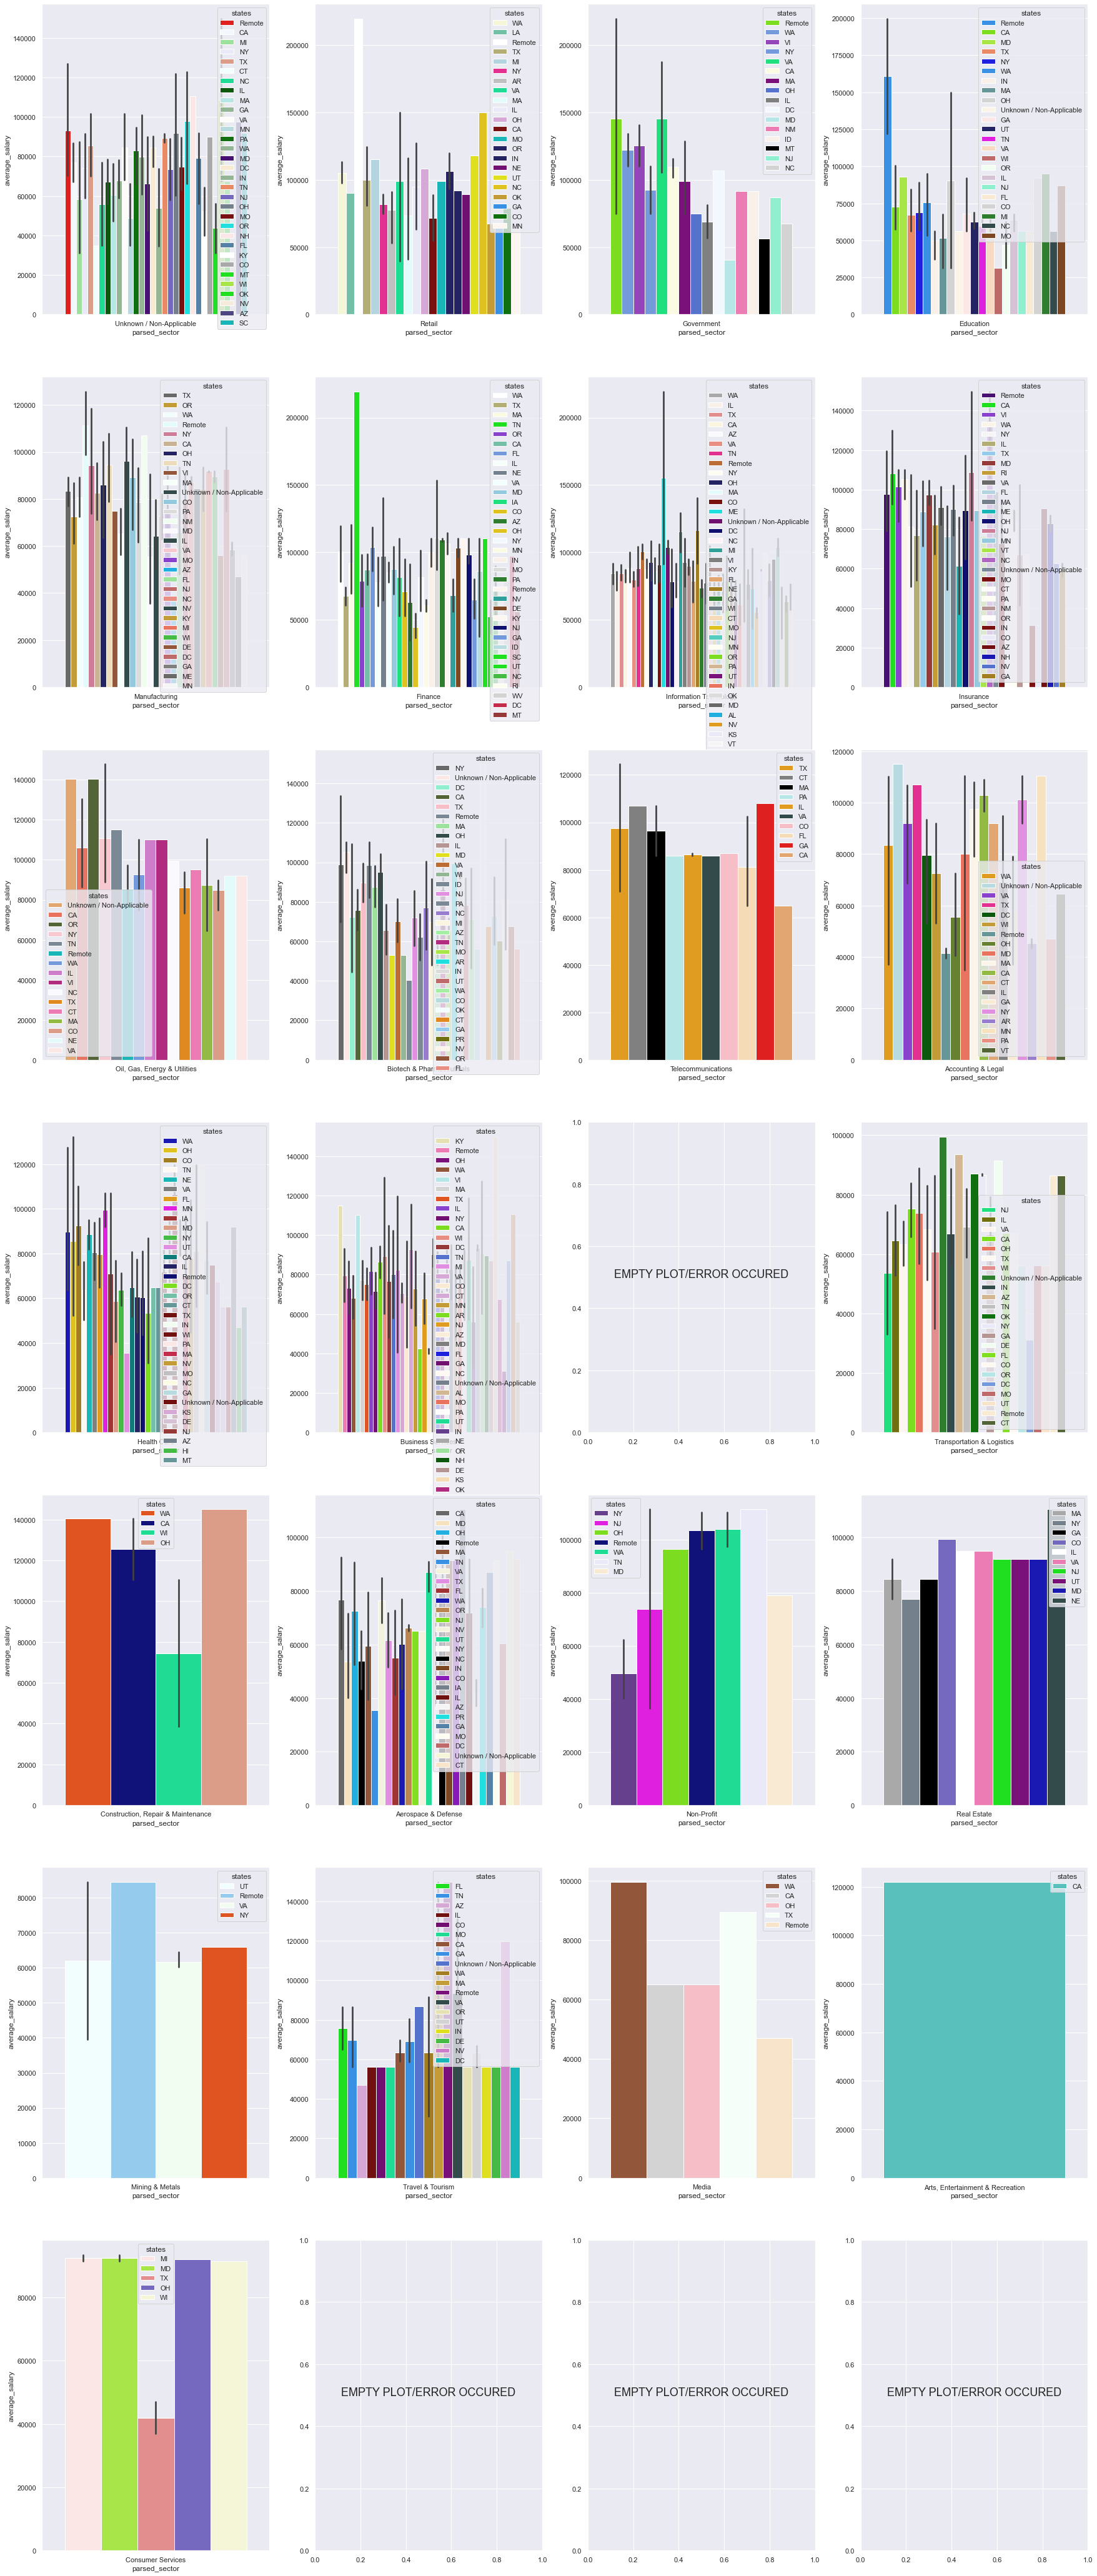

In [59]:
plot_multiple_barplots_with_hue(df, 'parsed_sector', 'average_salary', 'states', annotations=False)

We have 25 unique values in the given feature:parsed_sector  
Divide rows and columns:(Recommended 'Equally') 
How many rows: 5
How many columns: 5


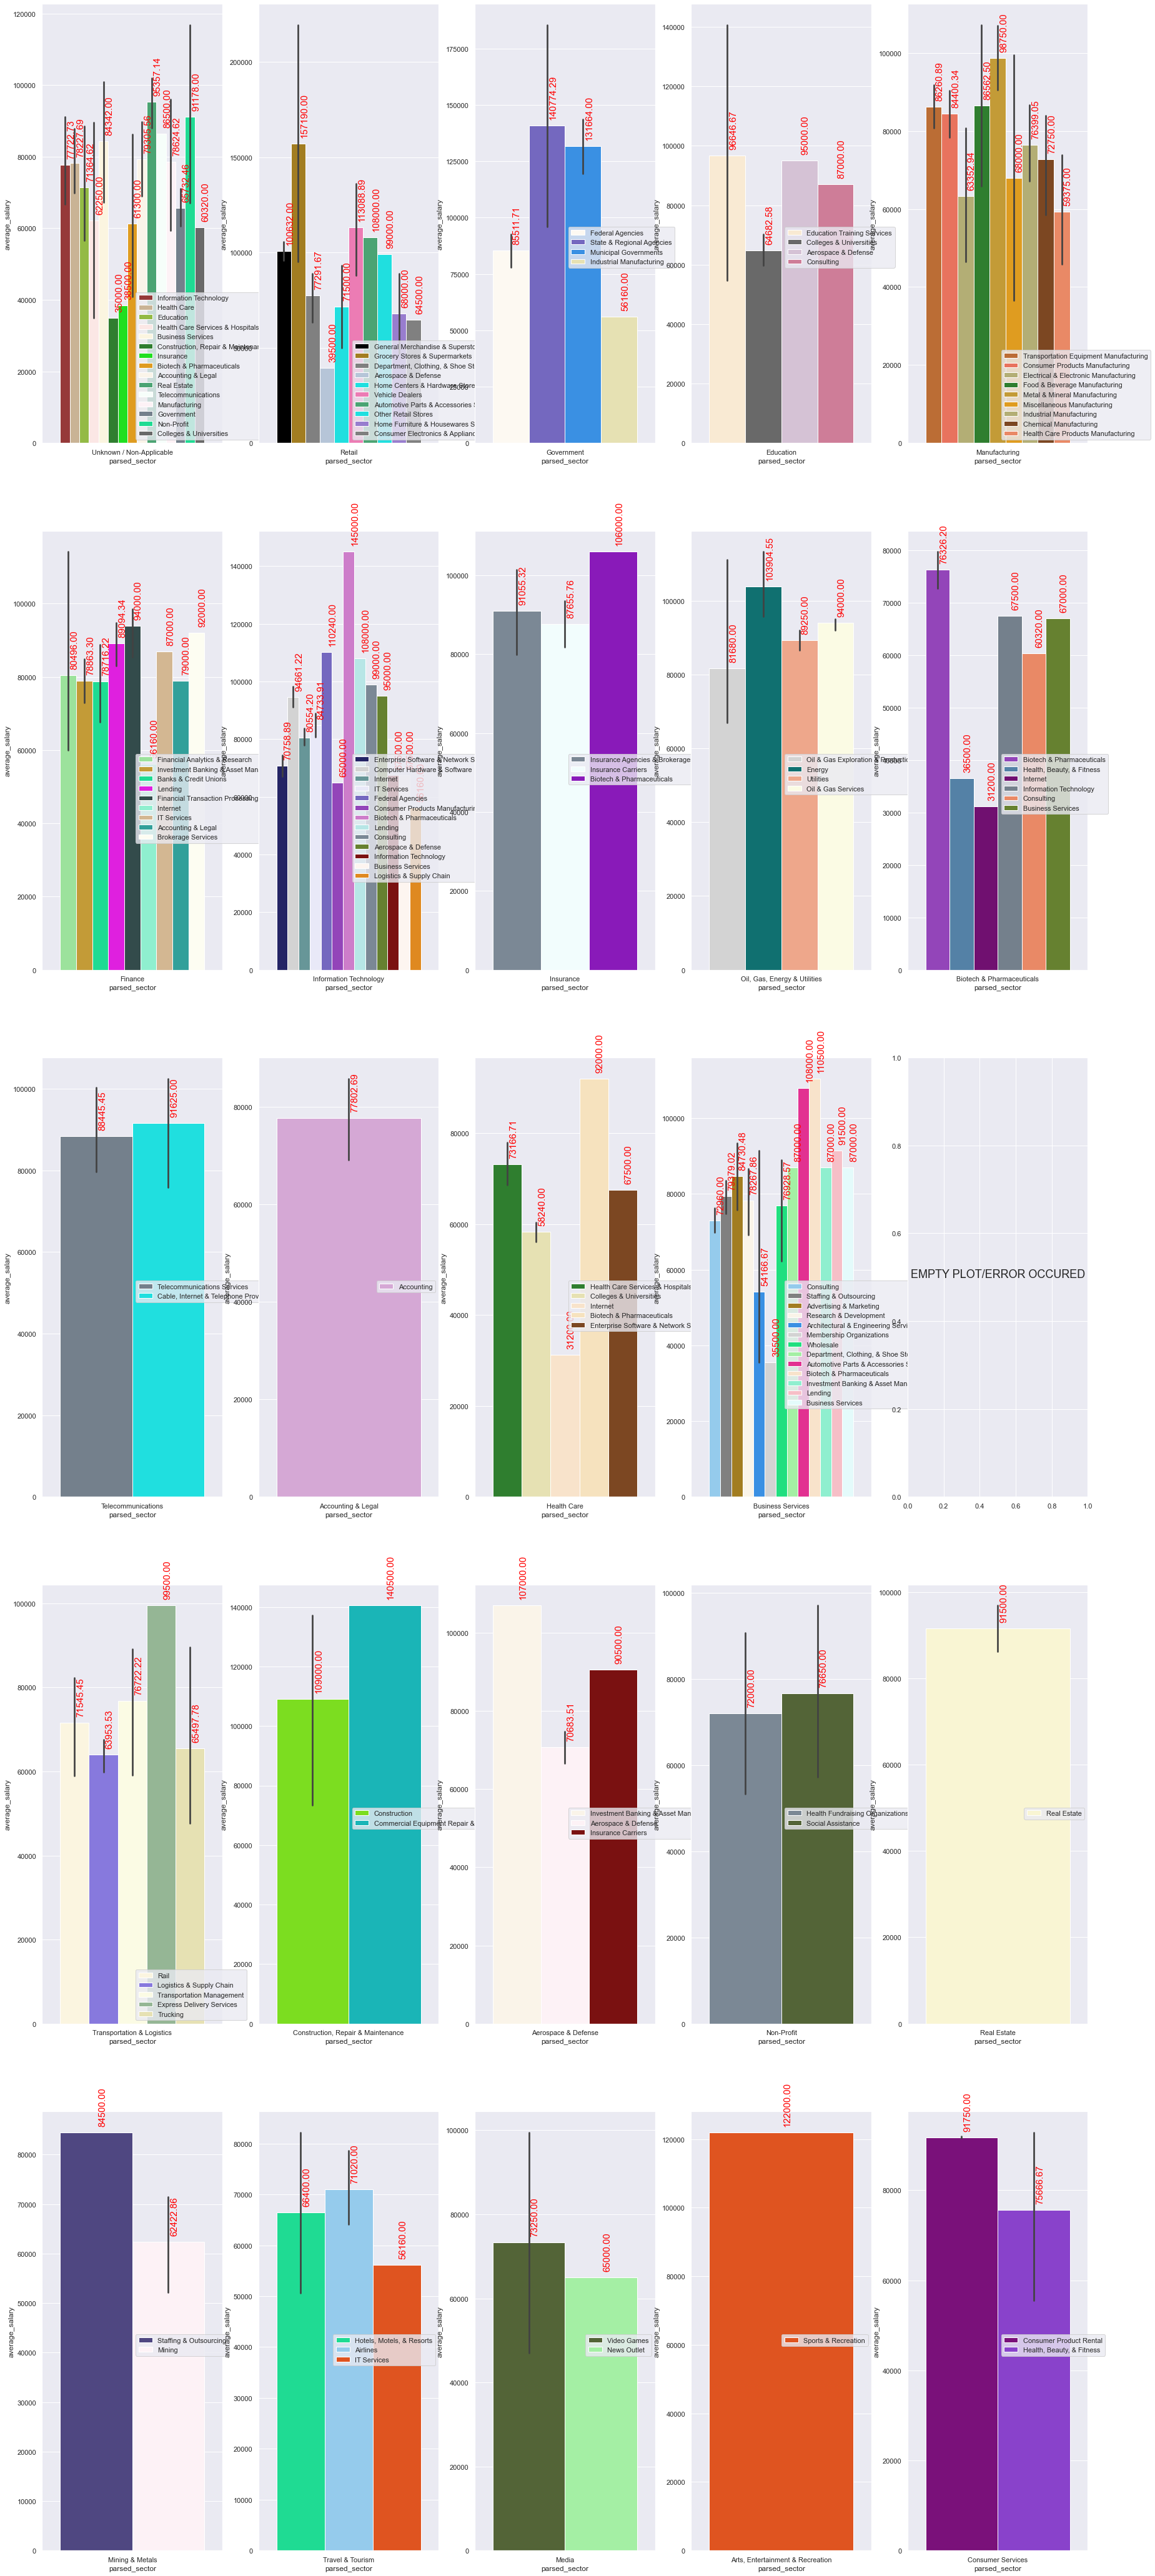

In [63]:
plot_multiple_barplots_with_hue(df, 'parsed_sector', 'average_salary', 'Industry', annotation_size=15)

We have 25 unique values in the given feature:parsed_sector  
Divide rows and columns:(Recommended 'Equally') 
How many rows: 5
How many columns: 5


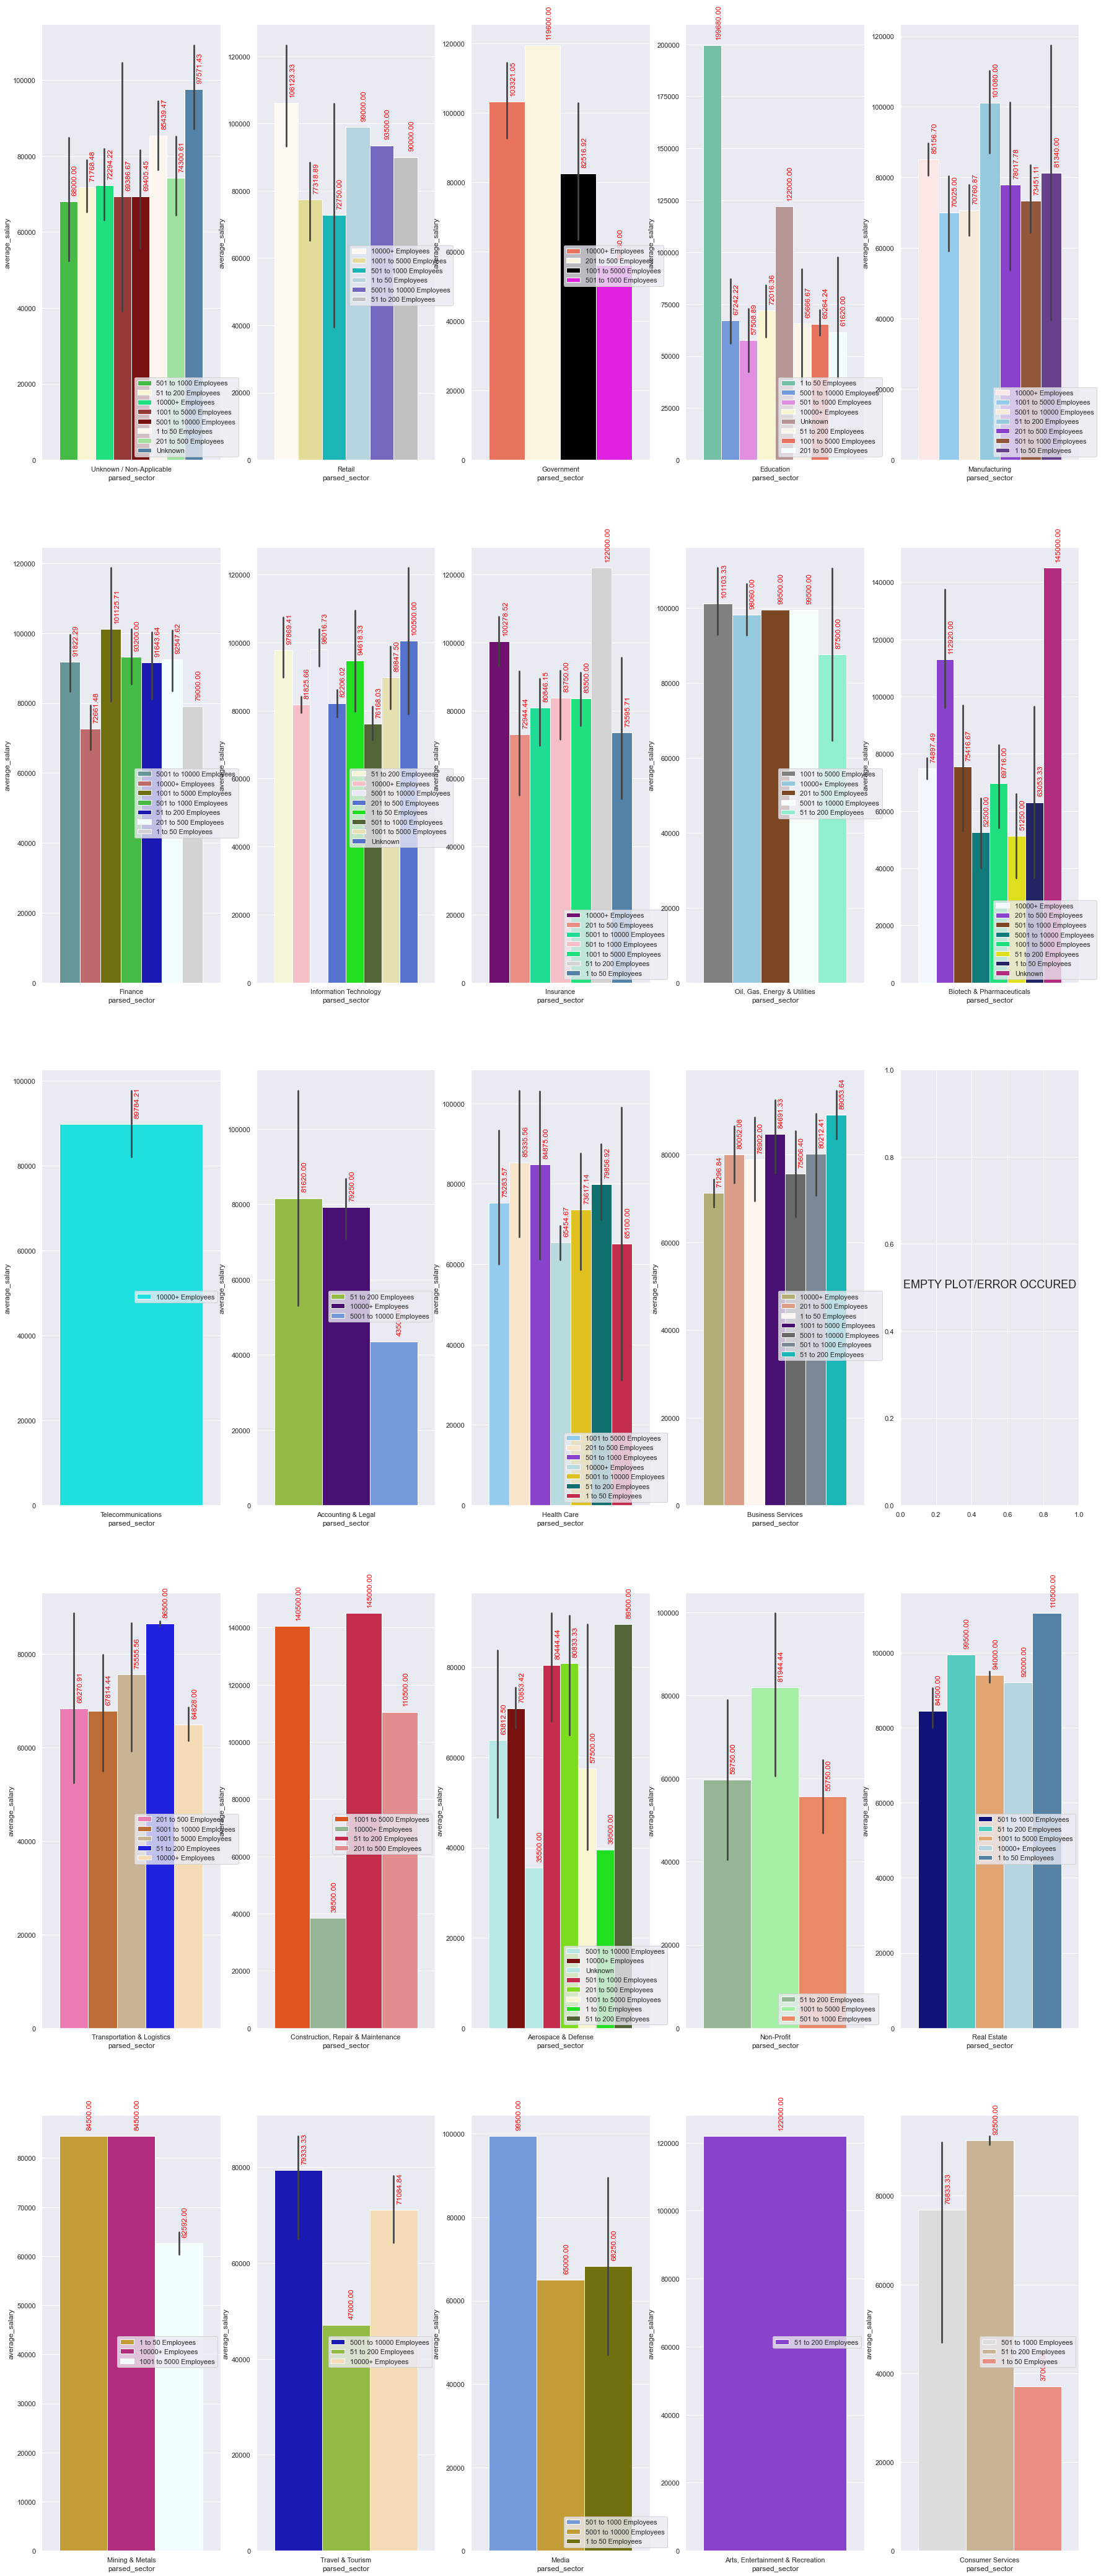

In [64]:
plot_multiple_barplots_with_hue(df, 'parsed_sector', 'average_salary', 'Size')

We have 25 unique values in the given feature:parsed_sector  
Divide rows and columns:(Recommended 'Equally') 
How many rows: 5
How many columns: 5


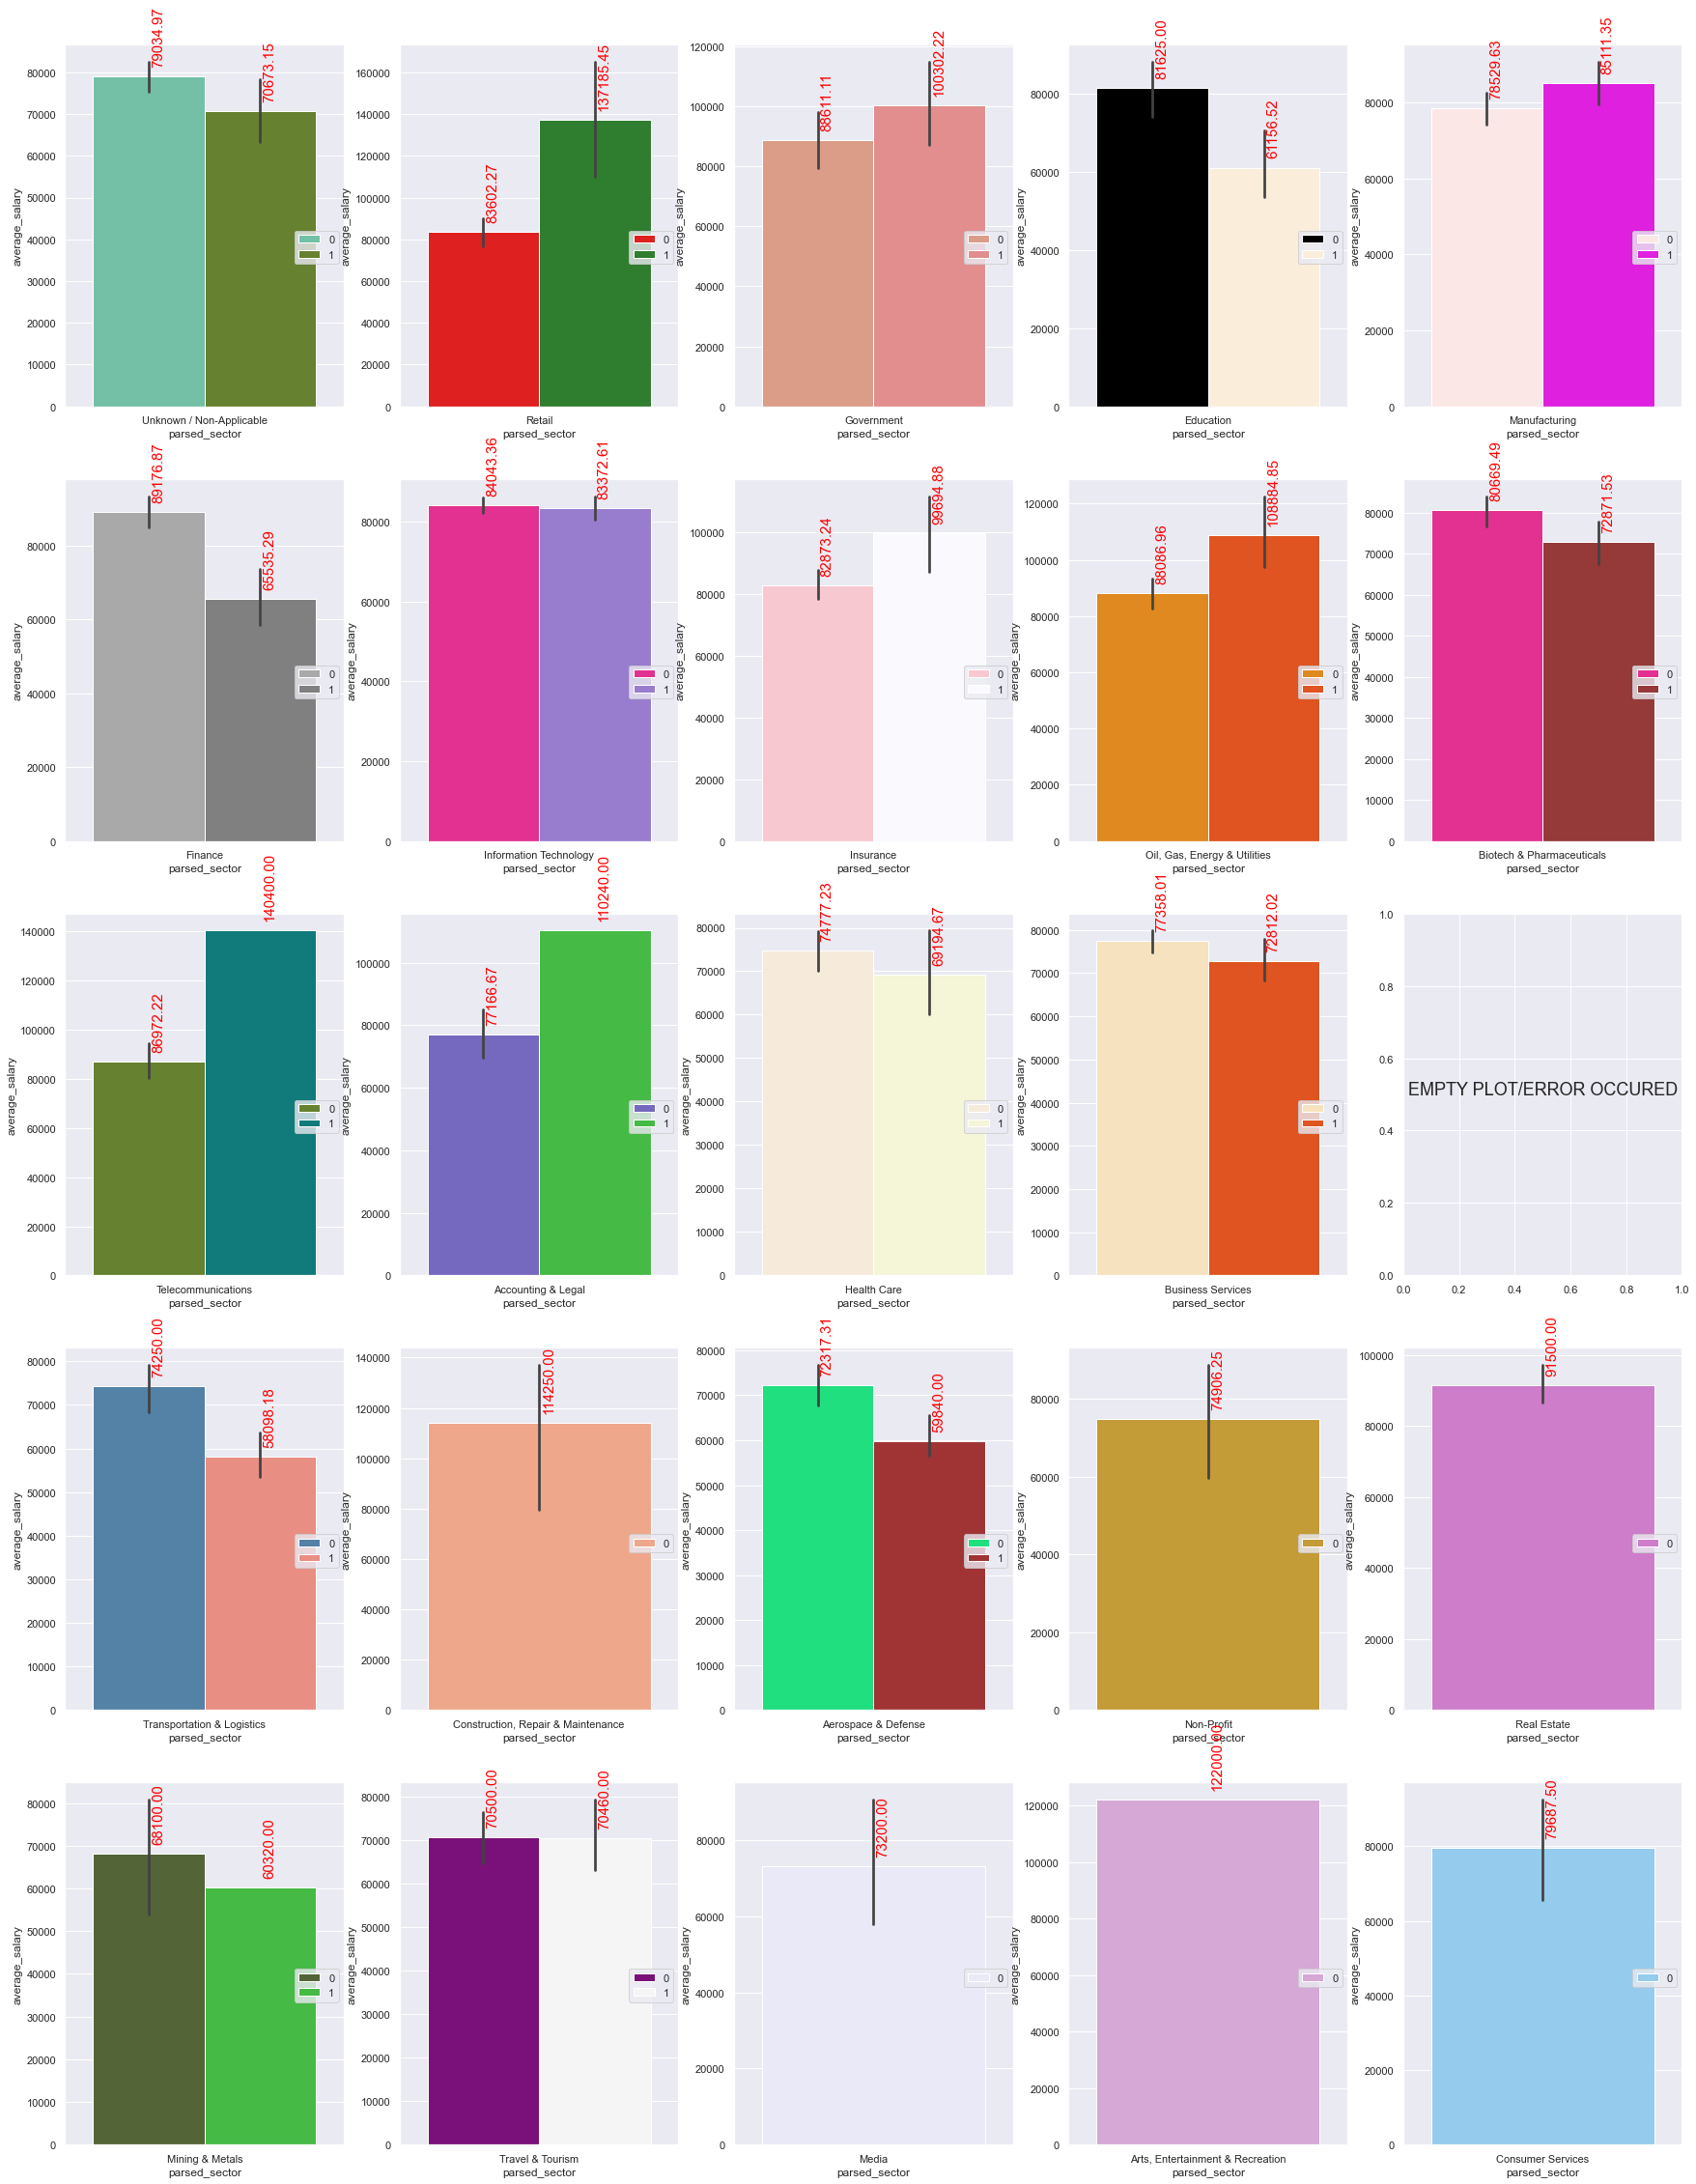

In [68]:
plot_multiple_barplots_with_hue(df, 'parsed_sector', 'average_salary', 'per_hour_salary_jobs', bar_height=40, bar_width=30, annotation_size=15)

### States

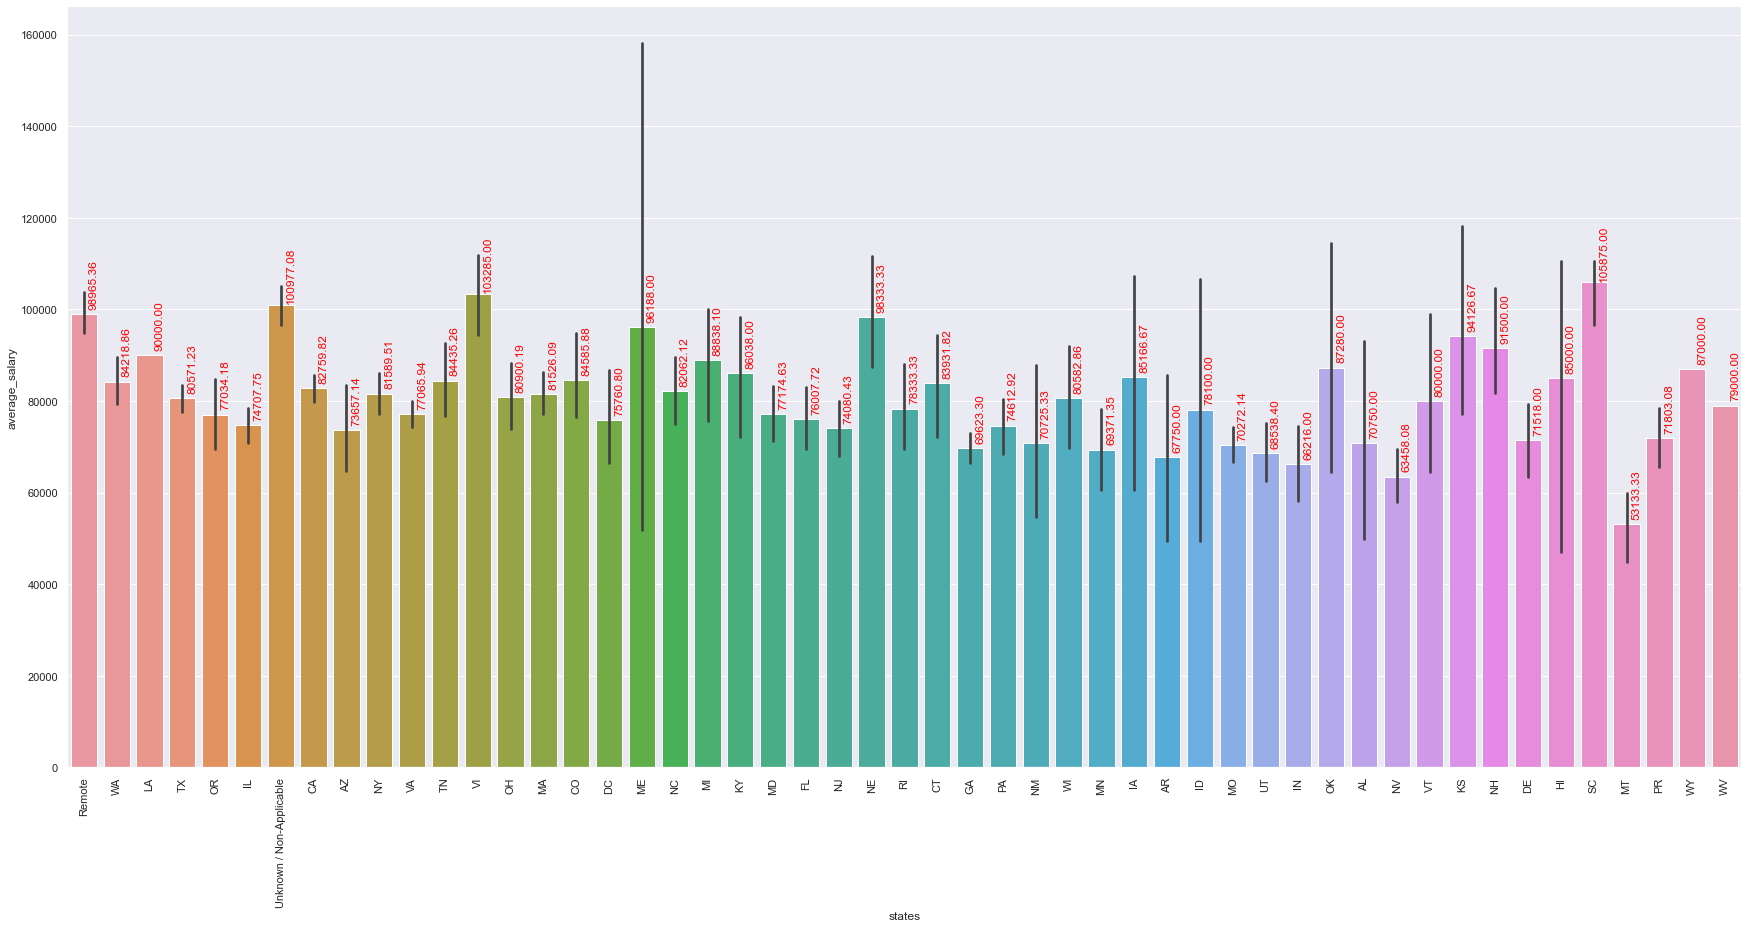

In [76]:
plot_barplot(df, 'states', 'average_salary')

We have 51 unique values in the given feature:states  
Divide rows and columns:(Recommended 'Equally') 
How many rows: 9
How many columns: 6


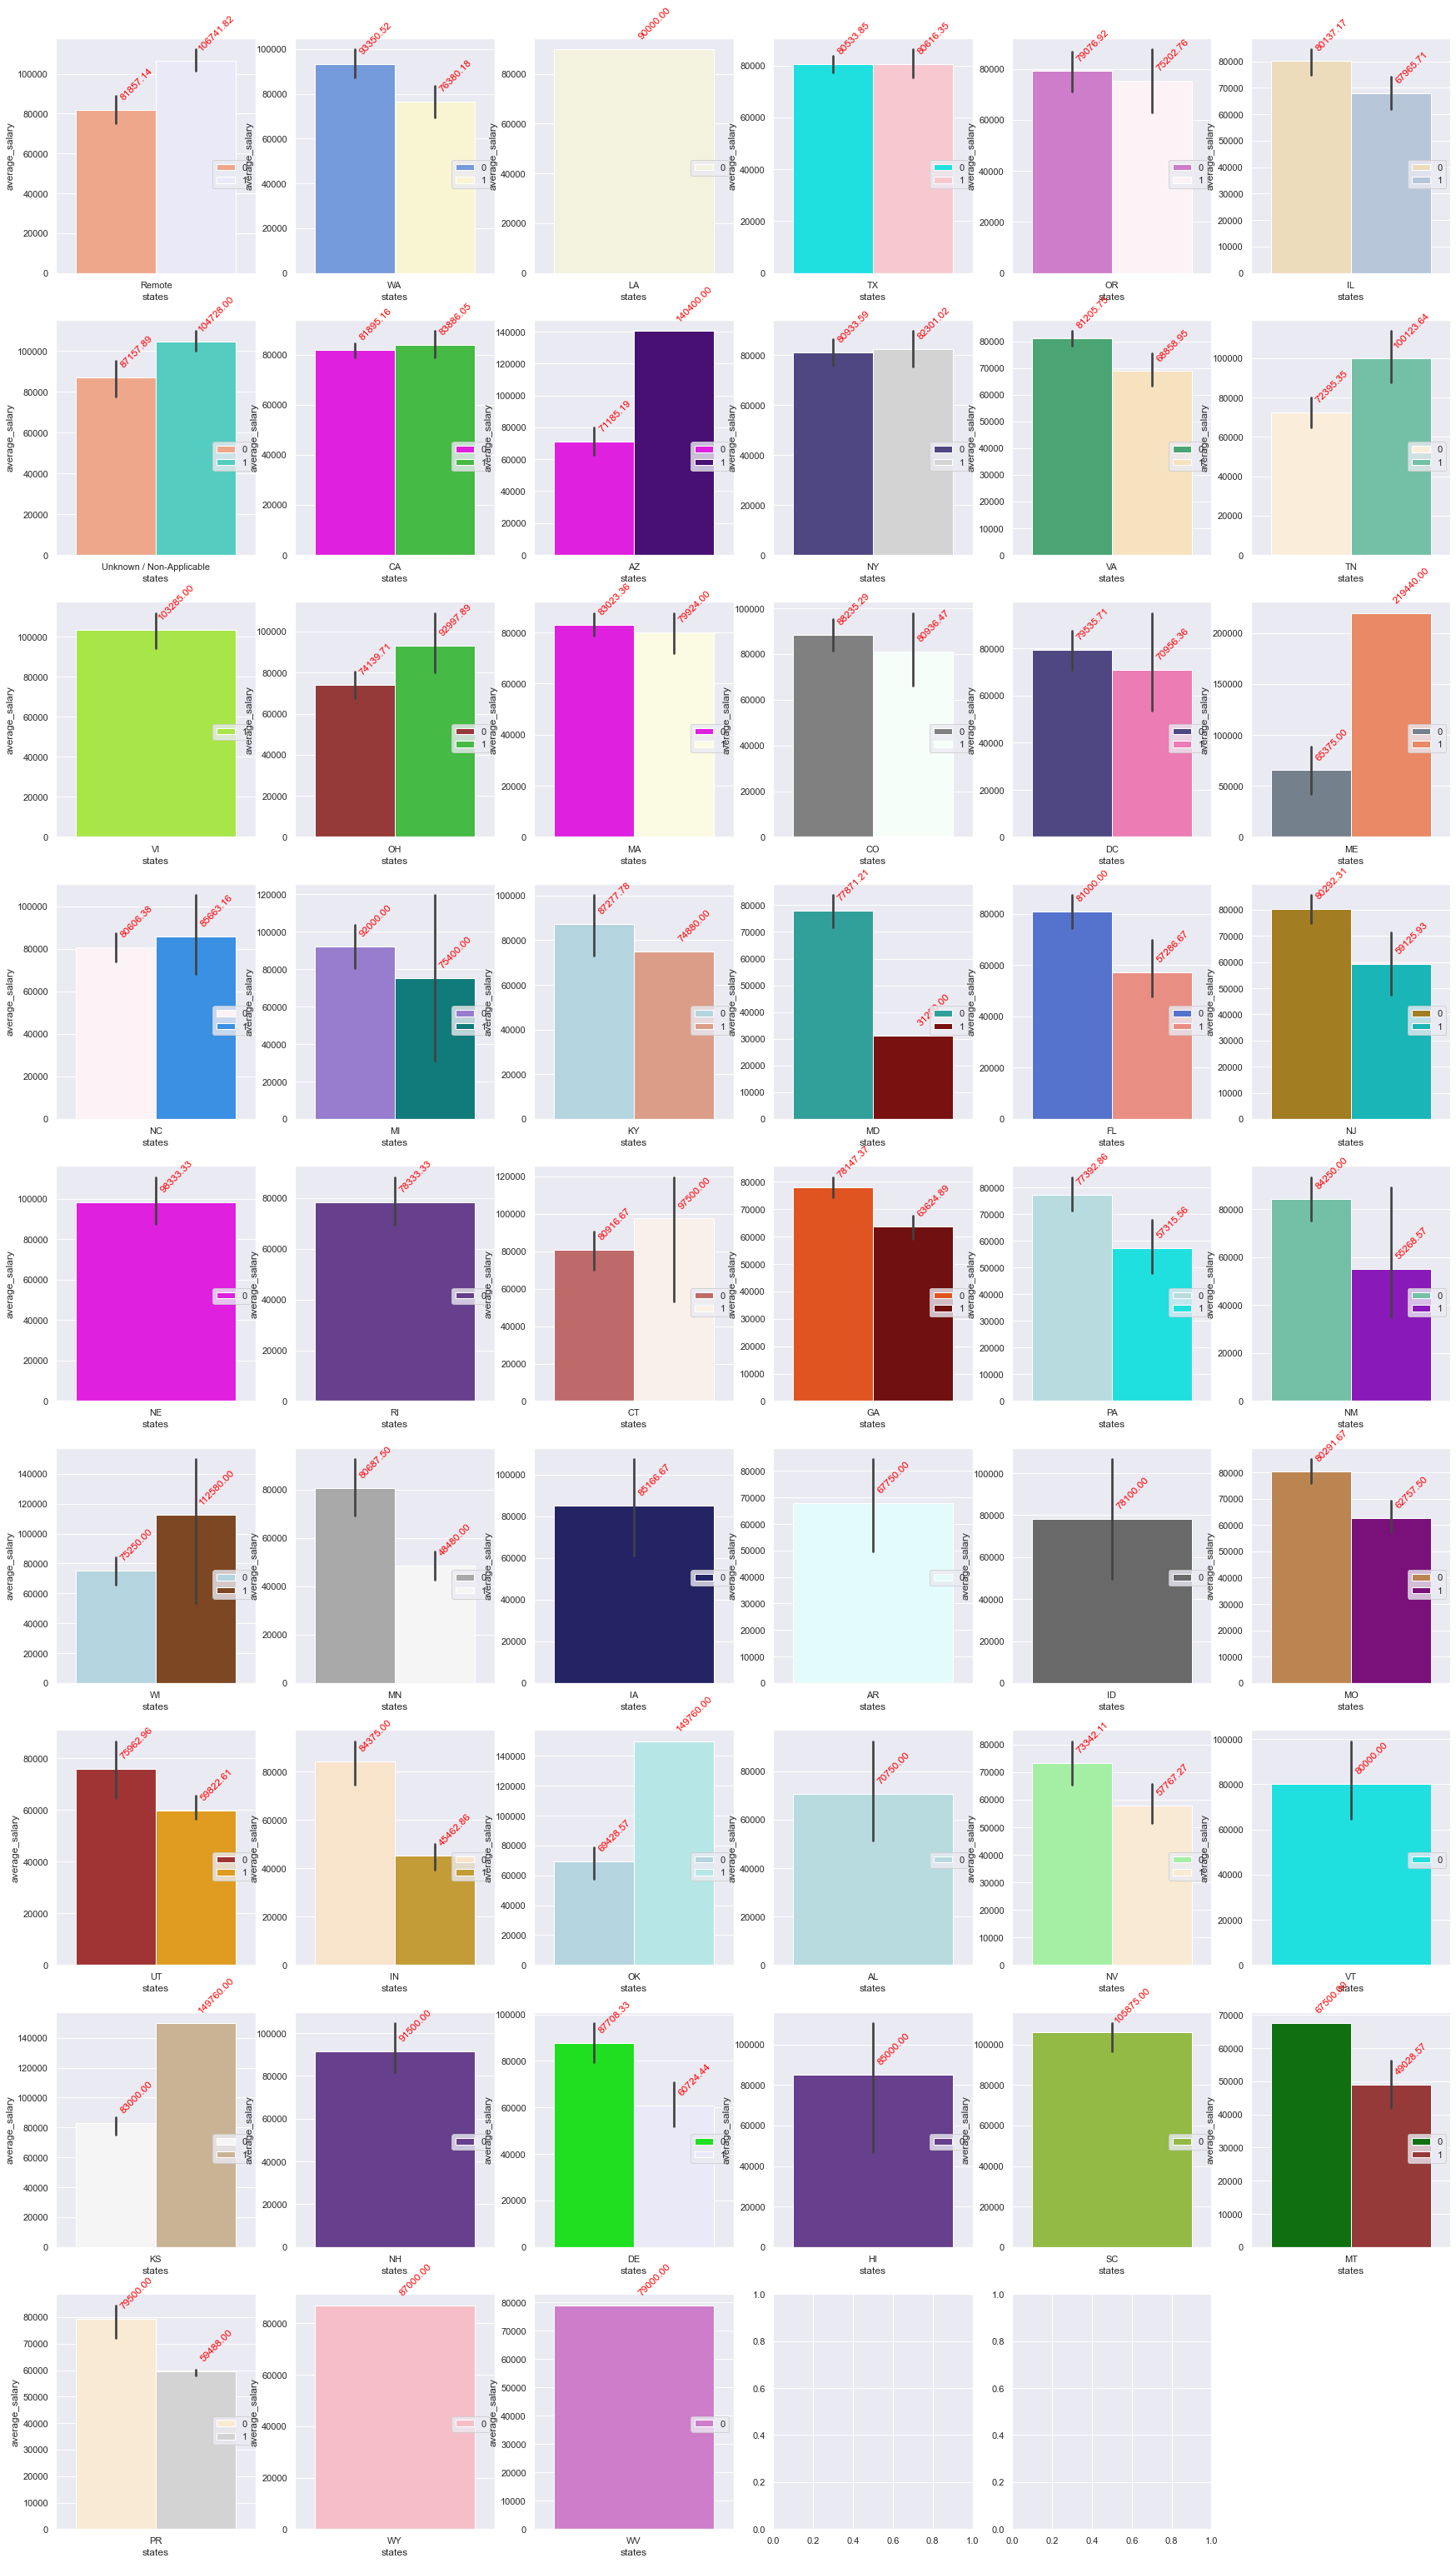

In [105]:
# plot_barplot_hue(df, 'states', 'average_salary', 'per_hour_salary_jobs', bar_height=40, annotations=False)

plot_multiple_barplots_with_hue(df, 'states', 'average_salary', 'per_hour_salary_jobs', bar_width=30, bar_height=55, rotation=45, annotation_xaxis=25)

### Industry

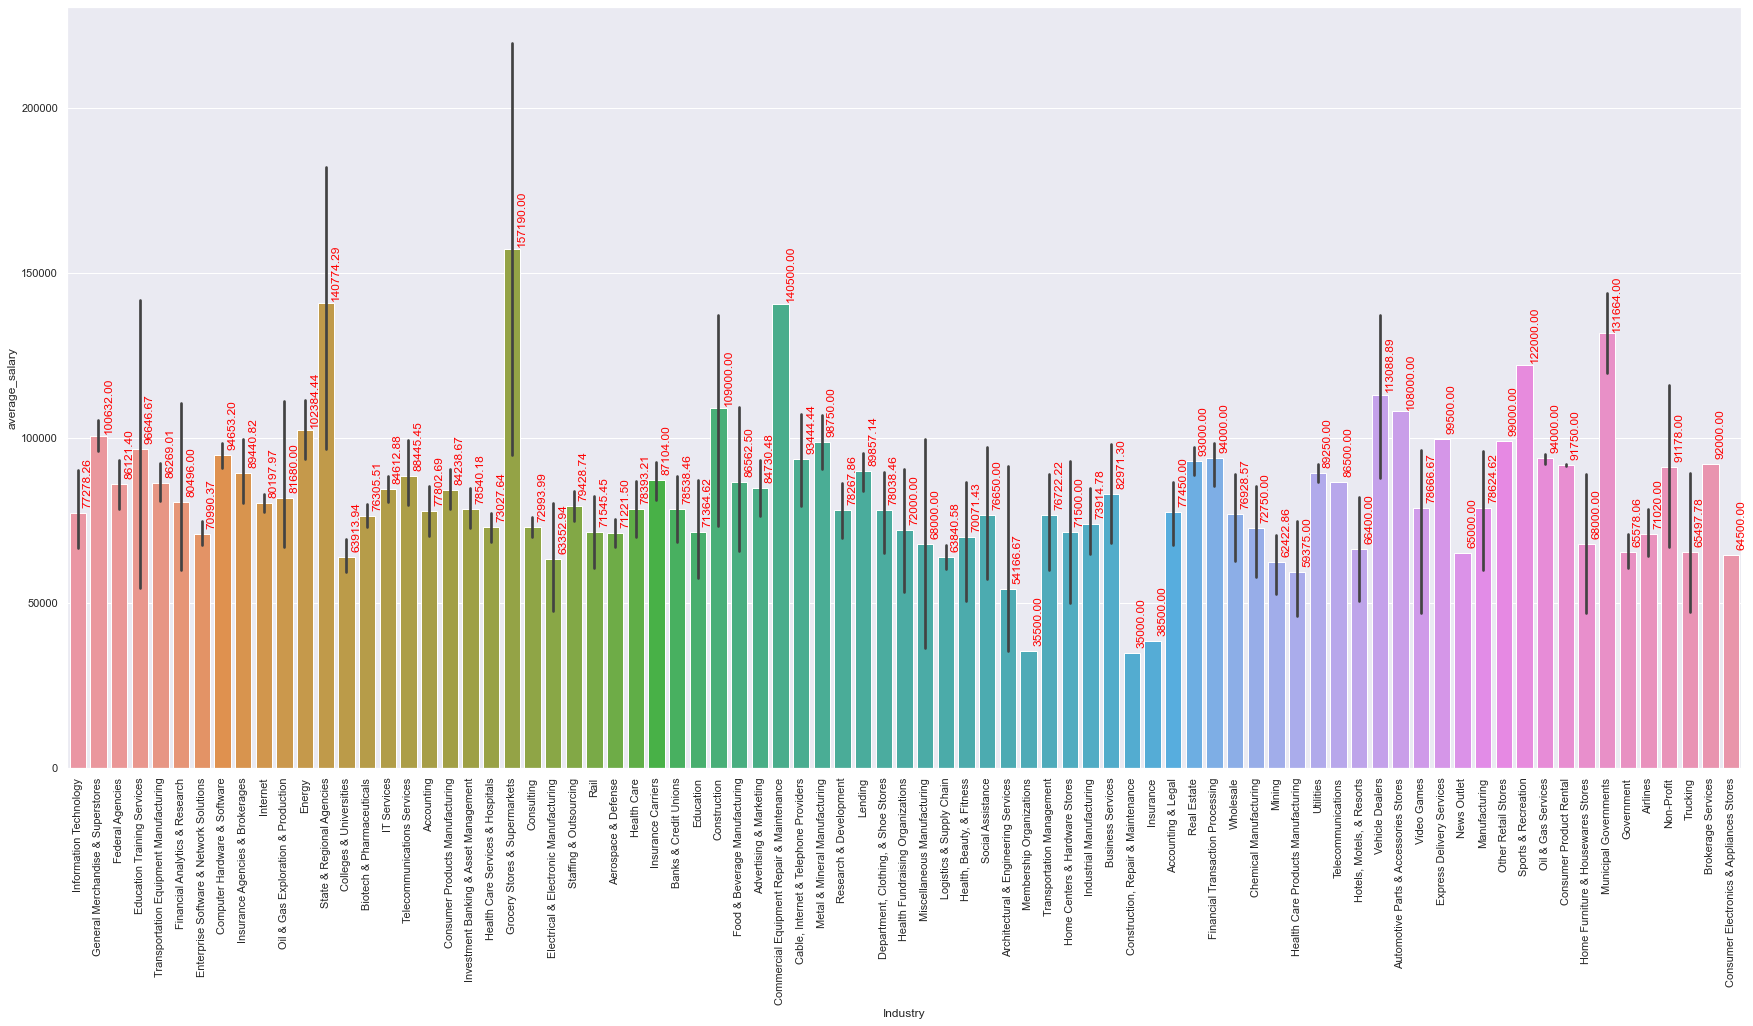

In [107]:
plot_barplot(df, 'Industry', 'average_salary')

### Size

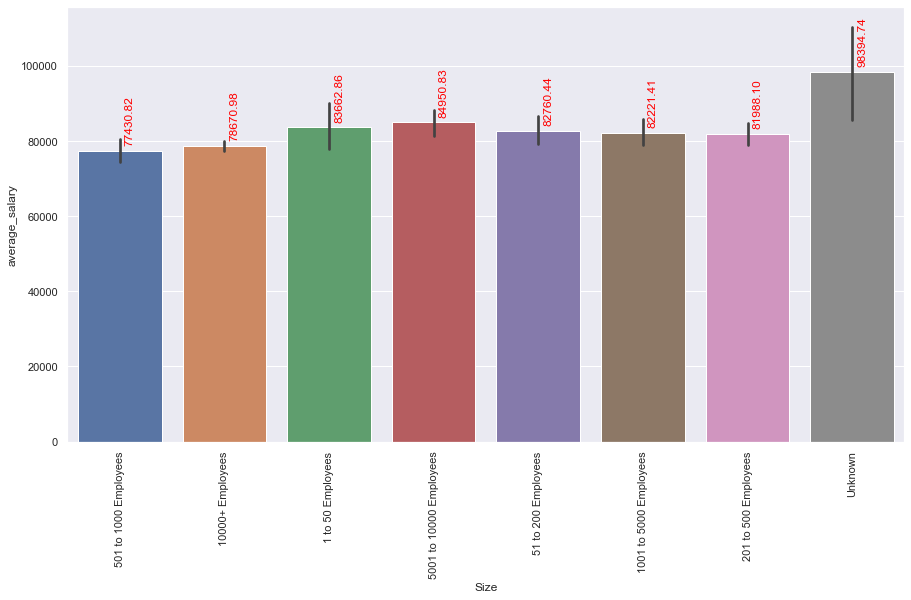

In [110]:
plot_barplot(df, 'Size', 'average_salary')

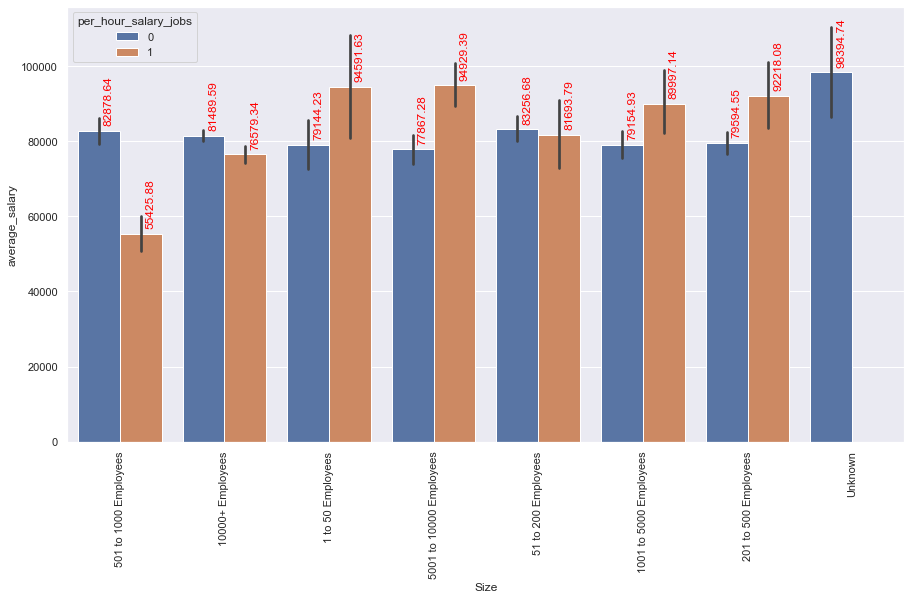

In [111]:
plot_barplot_hue(df, 'Size', 'average_salary', 'per_hour_salary_jobs')

# Countplots

In [144]:
def plot_countplot(dataset, x_axis, annotations=True, bar_width = 30, bar_height = 75, annotation_size=12):
    
    if len(dataset[x_axis].unique()) < 25 :
        sns.set(rc = {'figure.figsize':(15, 8)}) 
    else:
        sns.set(rc={'figure.figsize':(bar_width, bar_height)})
        
    plots = sns.countplot(data=dataset, x=x_axis)
    
    if annotations:
        for bar in plots.patches:
            plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',size=annotation_size, xytext=(0, 40), textcoords='offset points', color='red', rotation=90)


    plt.xticks(rotation=90)
    plt.show()
    
def plot_countplot_hue(dataset, x_axis, hue_name, annotations=True, bar_width = 30, bar_height = 75, annotation_size=12):
    
    if len(dataset[x_axis].unique()) < 25 :
        sns.set(rc = {'figure.figsize':(15, 8)}) 
    else:
        sns.set(rc = {'figure.figsize':(bar_width, bar_height)})
        
        
    plots = sns.countplot(data=dataset, x=x_axis, hue=hue_name)
    
    if annotations:
        for bar in plots.patches:
            plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',size=annotation_size, xytext=(0, 40), textcoords='offset points', color='red', rotation=90)

    plt.xticks(rotation=90)
#     plt.autoscale()
    plt.show()
    
def plot_countplot_yaxis_hue(dataset, y_axis, hue_name, annotations=True, bar_width = 30, bar_height = 75, annotation_size=12):
    
    if len(dataset[y_axis].unique()) < 25 :
        sns.set(rc = {'figure.figsize':(15, 8)}) 
    else:
        sns.set(rc = {'figure.figsize':(bar_width, bar_height)})
        
        
    plots = sns.countplot(data=dataset, y=y_axis, hue=hue_name)
    
    if annotations:
        for bar in plots.patches:
            plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',size=annotation_size, xytext=(0, 40), textcoords='offset points', color='red', rotation=90)

    plt.xticks(rotation=90)
    plt.show()
    
def plot_multiple_countplot_with_hue(dataset, column_name, hue_namem, annotations=True, bar_width = 30, bar_height = 75, annotation_size=12, rotation=90, annotation_xaxis = 10):
    
    print("We have {} unique values in the given feature:{}  \nDivide rows and columns:(Recommended 'Equally') ".format(len(dataset[column_name].unique()), column_name))

    n_rows = int(input("How many rows: ")) 
    n_cols = int(input("How many columns: "))


    if n_rows < n_cols:
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(35, 15))
    else:
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(bar_width, bar_height))

    category_name = dataset[column_name].unique()
    z = 0
    
    

    for i in range(n_rows): 
        for j in range(n_cols):
            try:
                partial_data = dataset[dataset[column_name] == category_name[z]]
                plots = sns.countplot(ax=axes[i, j], data=partial_data, x = column_name, hue = hue_name)

                if annotations:
                    plots.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5), loc='best')
                    for bar in plots.patches:
                        plots.annotate(format(bar.get_height(), '.2f'),
                                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom',size=annotation_size, xytext=(annotation_xaxis, 40), textcoords='offset points', color='red', rotation=rotation)
                
            except:
                axes[i, j].text(0.5, 0.5, s='EMPTY PLOT/ERROR OCCURED', fontsize=18, ha='center')
            z+=1


### Revenue

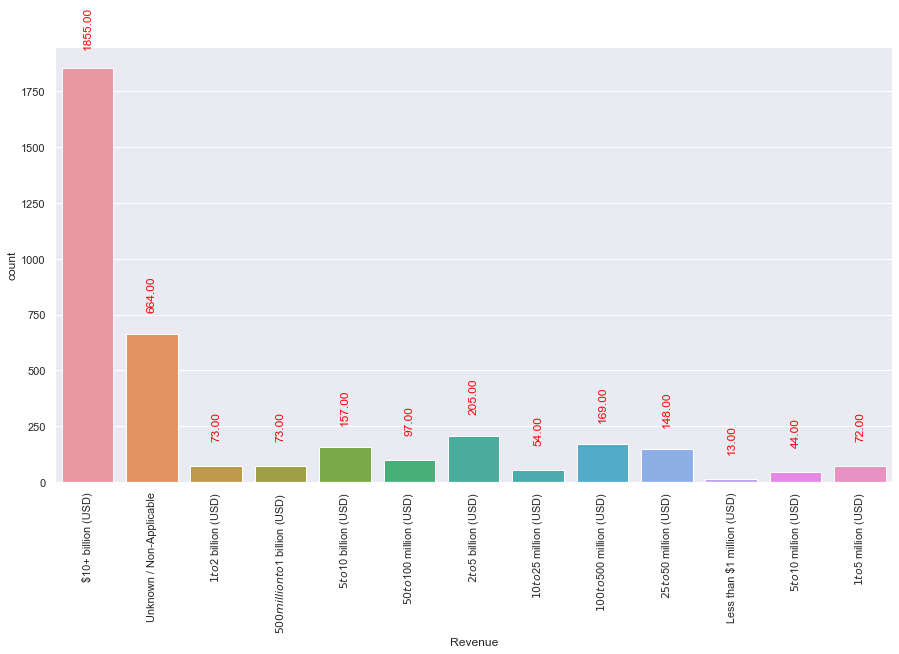

In [117]:
plot_countplot(df, 'Revenue')

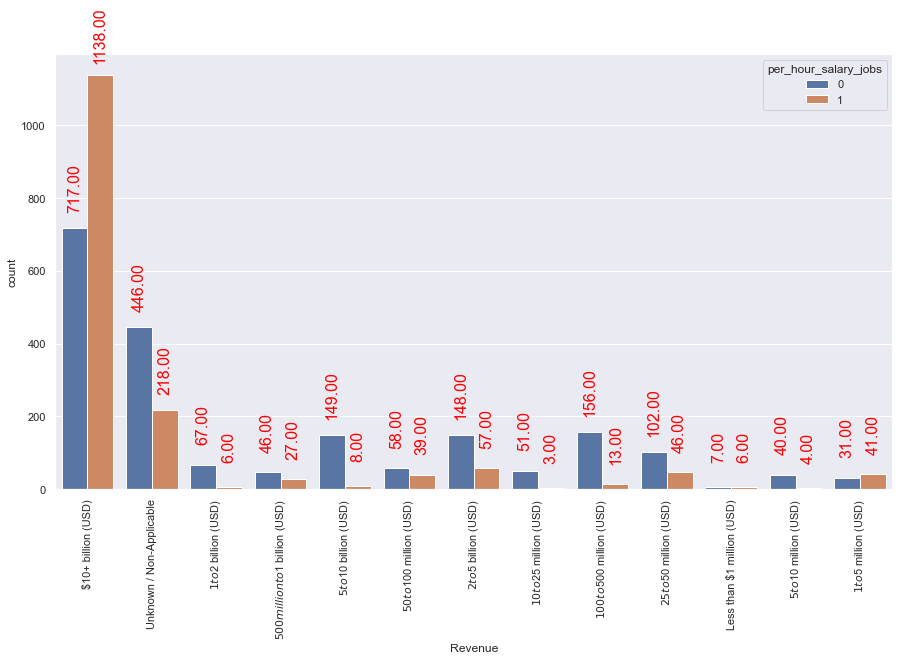

In [119]:
plot_countplot_hue(df, 'Revenue', 'per_hour_salary_jobs', annotation_size=16)

### Sector

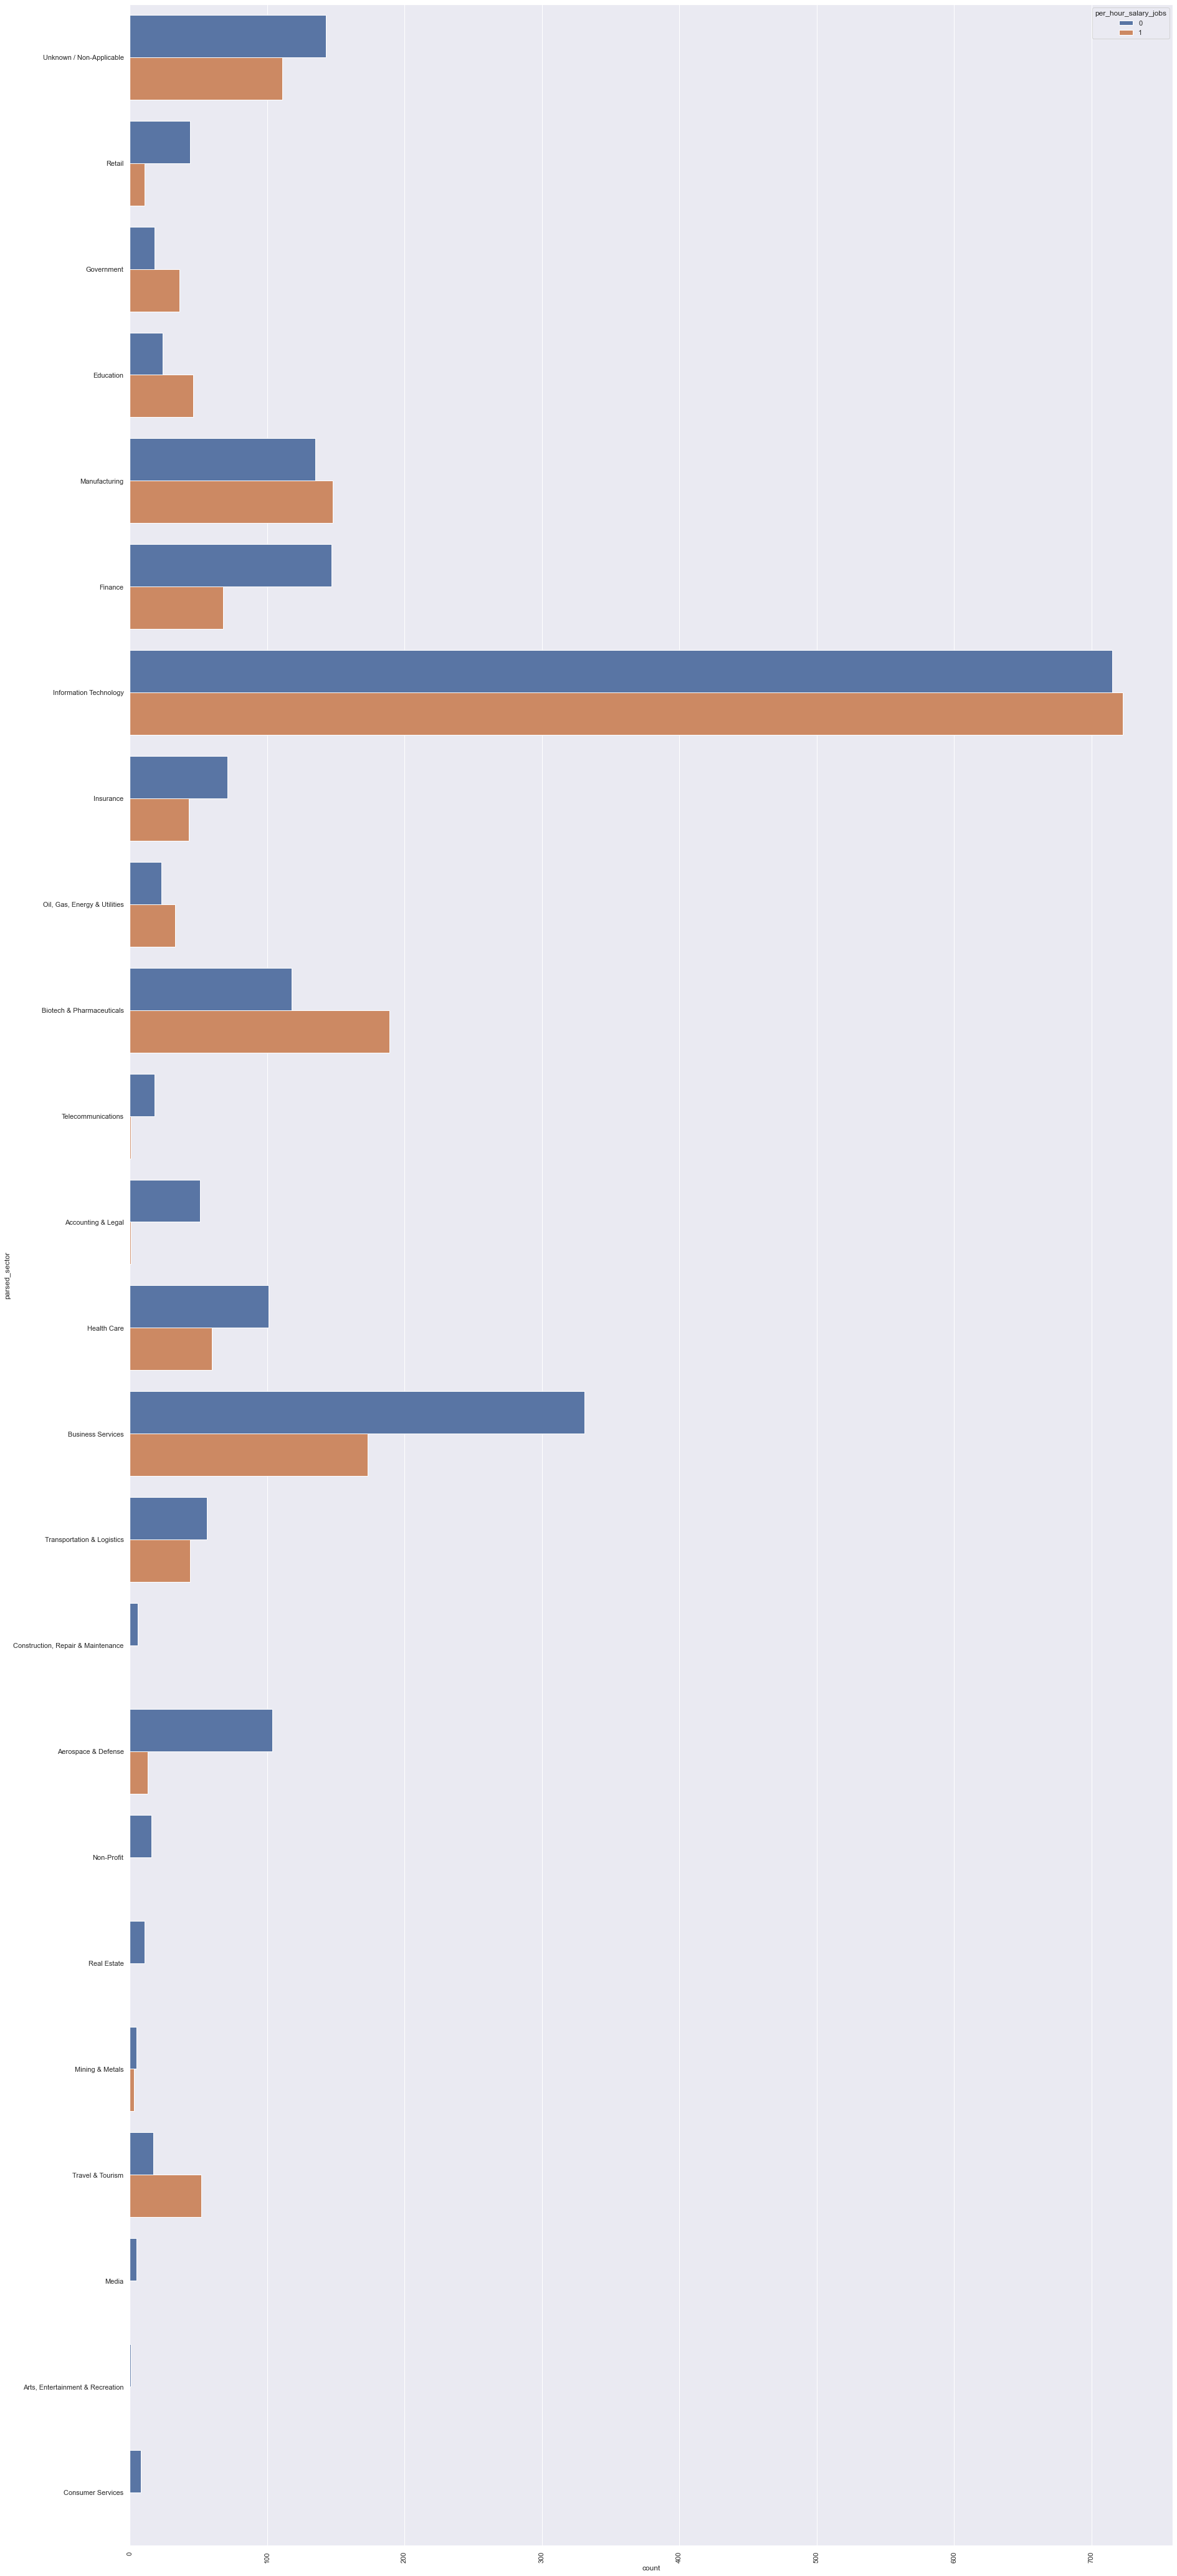

In [129]:
plot_countplot_yaxis_hue(df, 'parsed_sector', 'per_hour_salary_jobs', annotations=False)

### Industry

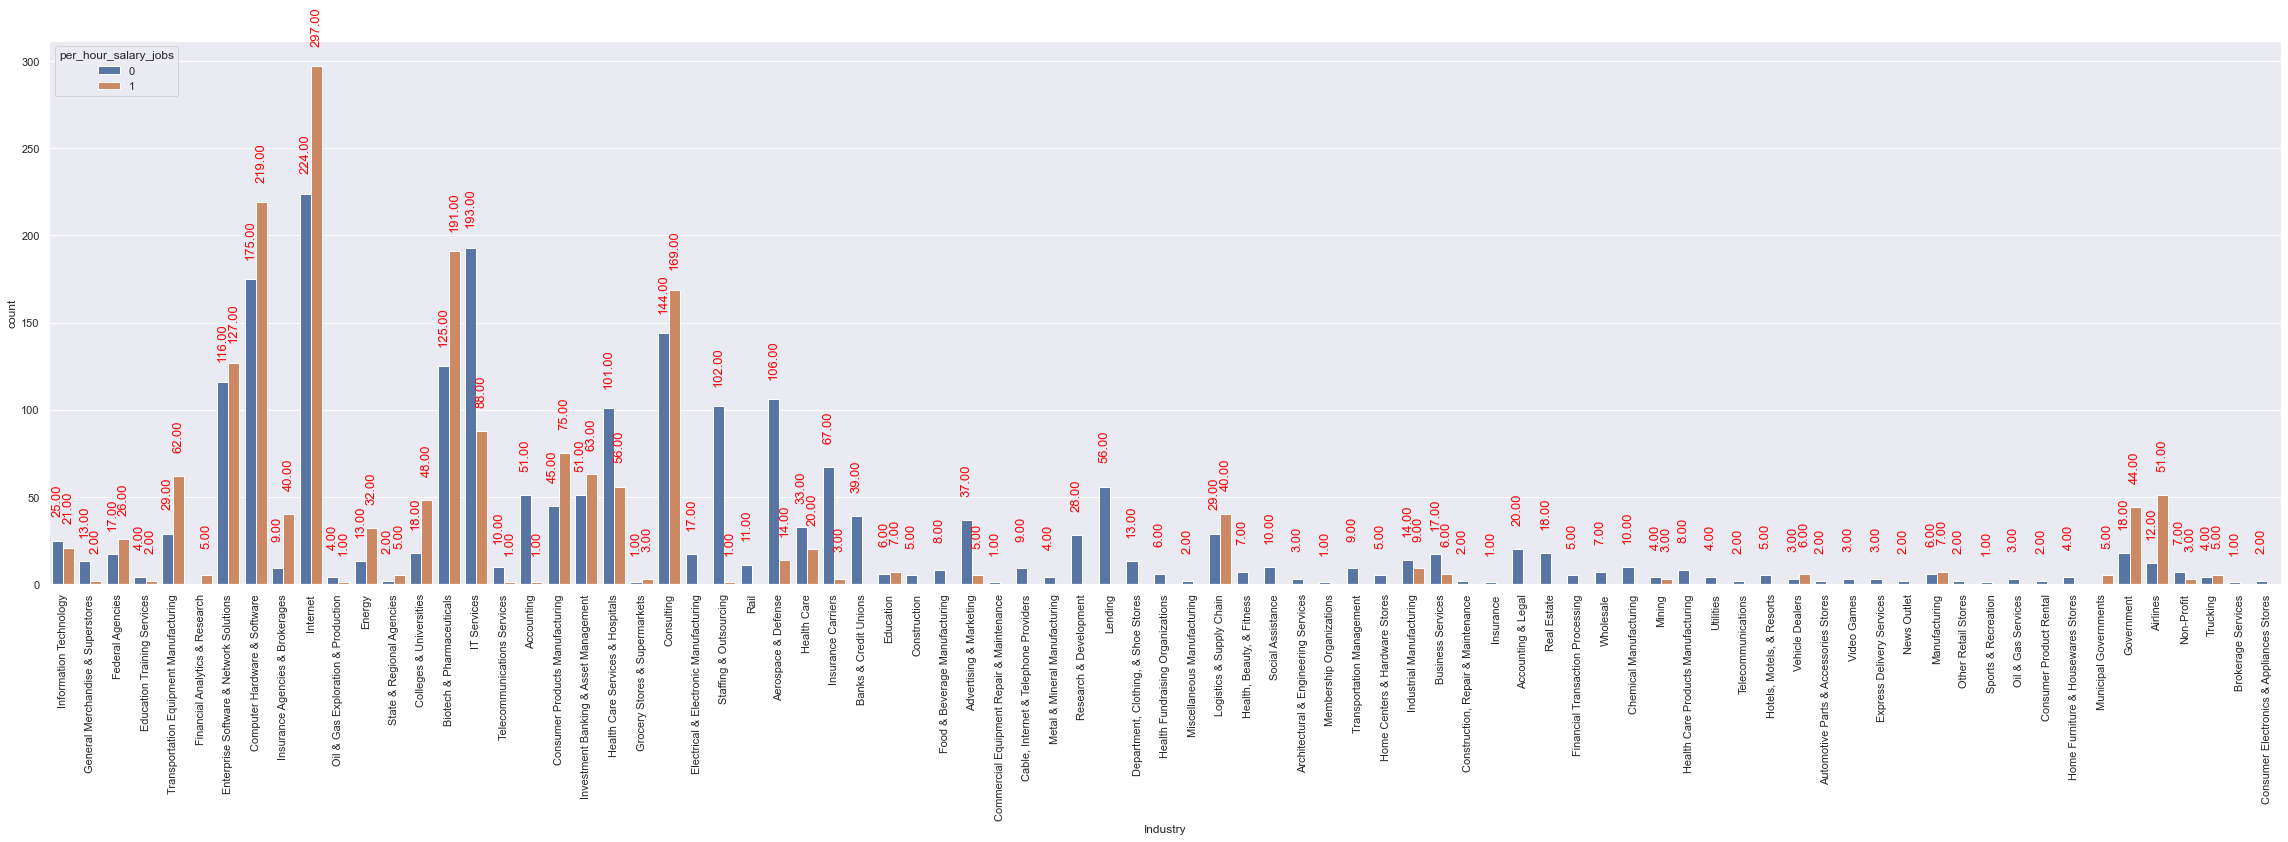

In [145]:
plot_countplot_hue(df, 'Industry', 'per_hour_salary_jobs', bar_height=10, bar_width=40, annotation_size=13)

### Size

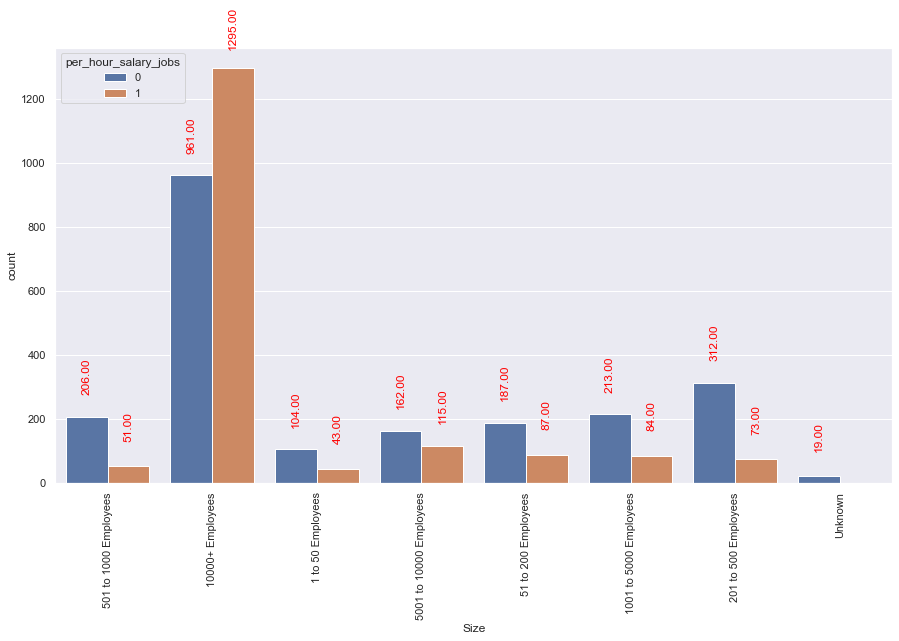

In [149]:
plot_countplot_hue(df, 'Size', 'per_hour_salary_jobs')

# Scatter plots for categorical data

In [3]:
def plot_catplot(dataset, x_axis, y_axis, kind='strip', xaxis_width=6, yaxis_height=2, outliers=True):
    
    sns.catplot(data = dataset, x=x_axis, y=y_axis, kind=kind, height=xaxis_width, aspect=yaxis_height, showfliers=outliers)
    
    plt.xticks(rotation=90)
    plt.show()
    
def plot_catplot_hue(dataset, x_axis, y_axis, hue_name, kind='strip', xaxis_width=6, yaxis_height=2, outliers=True):
    
    sns.catplot(data = dataset, x=x_axis, y=y_axis, hue=hue_name, kind=kind, height=xaxis_width, aspect=yaxis_height, showfliers=outliers)
    
    plt.xticks(rotation=90)
    plt.show()

    
  

## Revenue

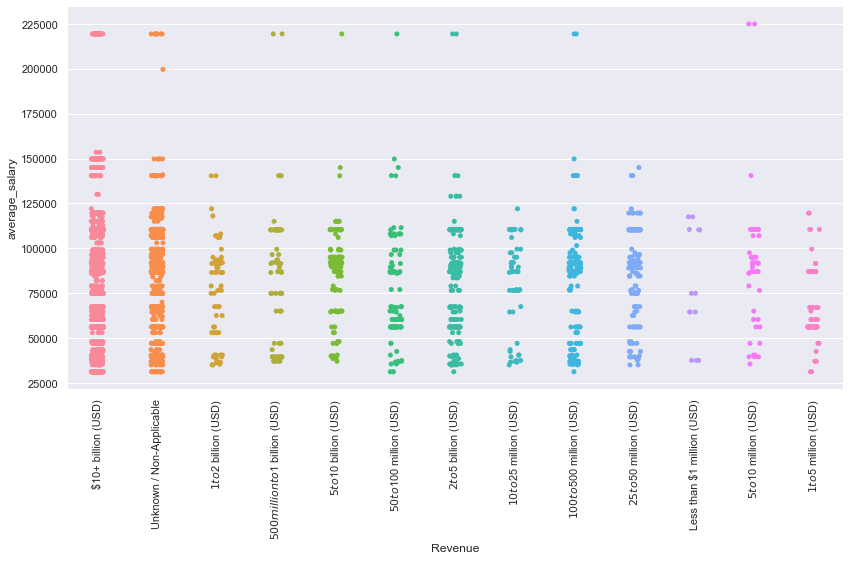

In [197]:
plot_catplot(df, 'Revenue', 'average_salary')

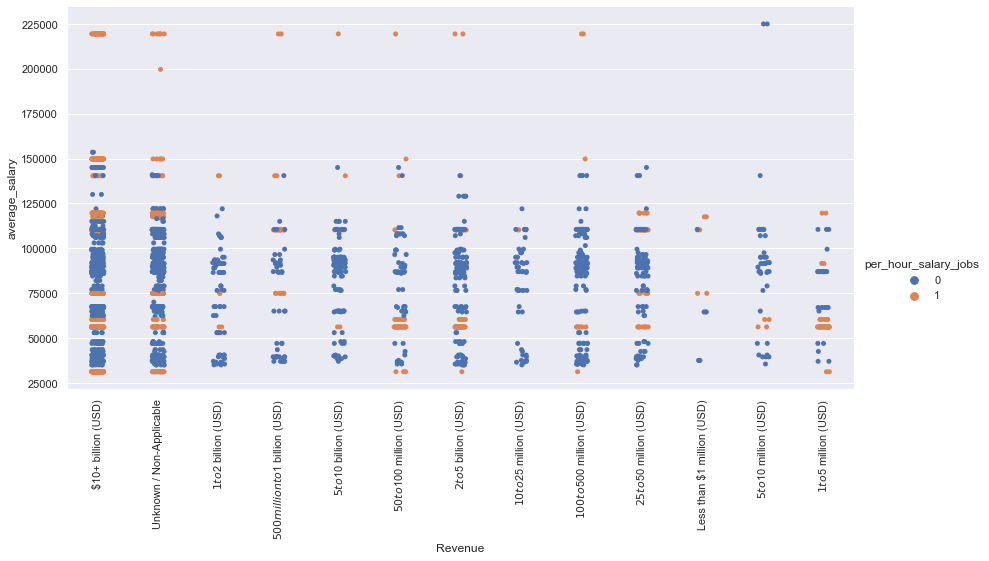

In [198]:
plot_catplot_hue(df, 'Revenue', 'average_salary', 'per_hour_salary_jobs')

## Sector

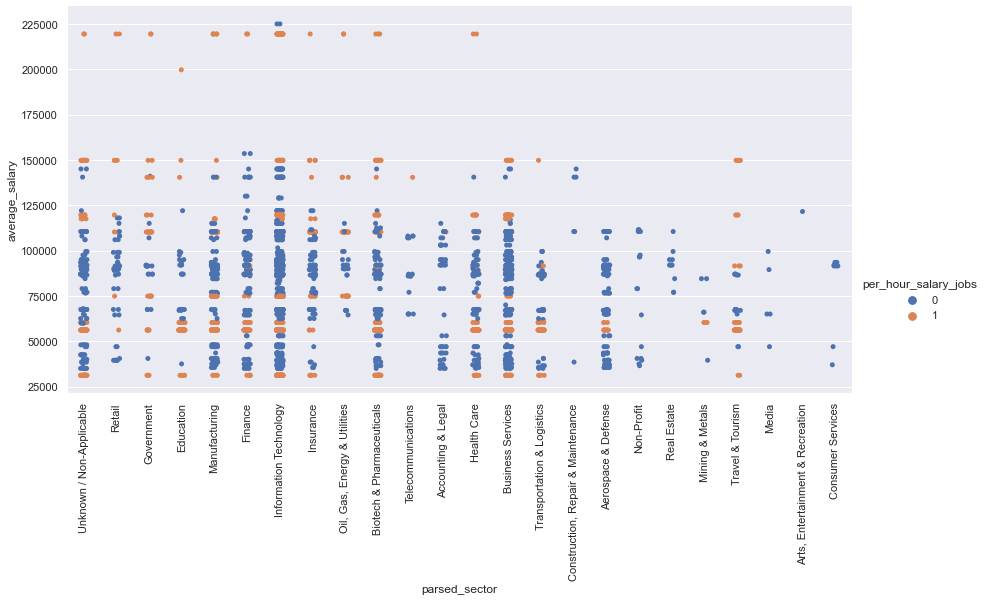

In [199]:
plot_catplot_hue(df, 'parsed_sector', 'average_salary', 'per_hour_salary_jobs')

# Distribution plots for categorical data

## Revenue

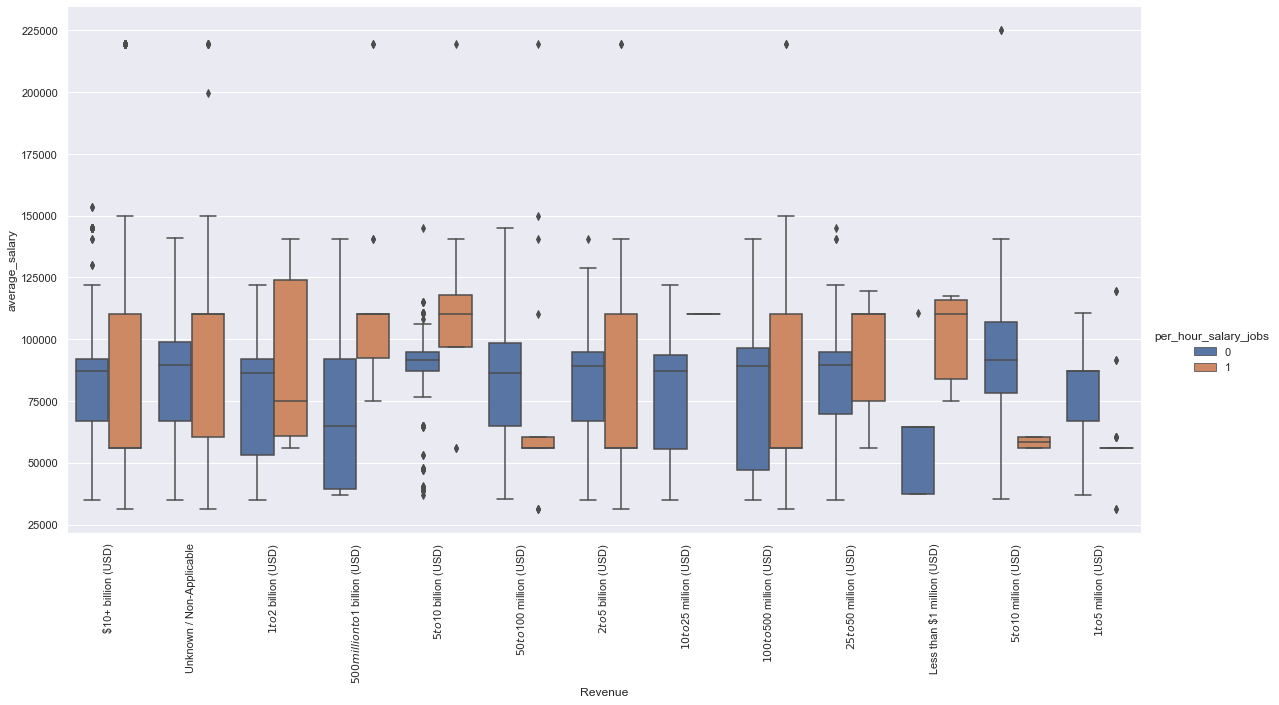

In [203]:
plot_catplot_hue(df, 'Revenue', 'average_salary', 'per_hour_salary_jobs', kind='box', xaxis_width=8)

## Sector

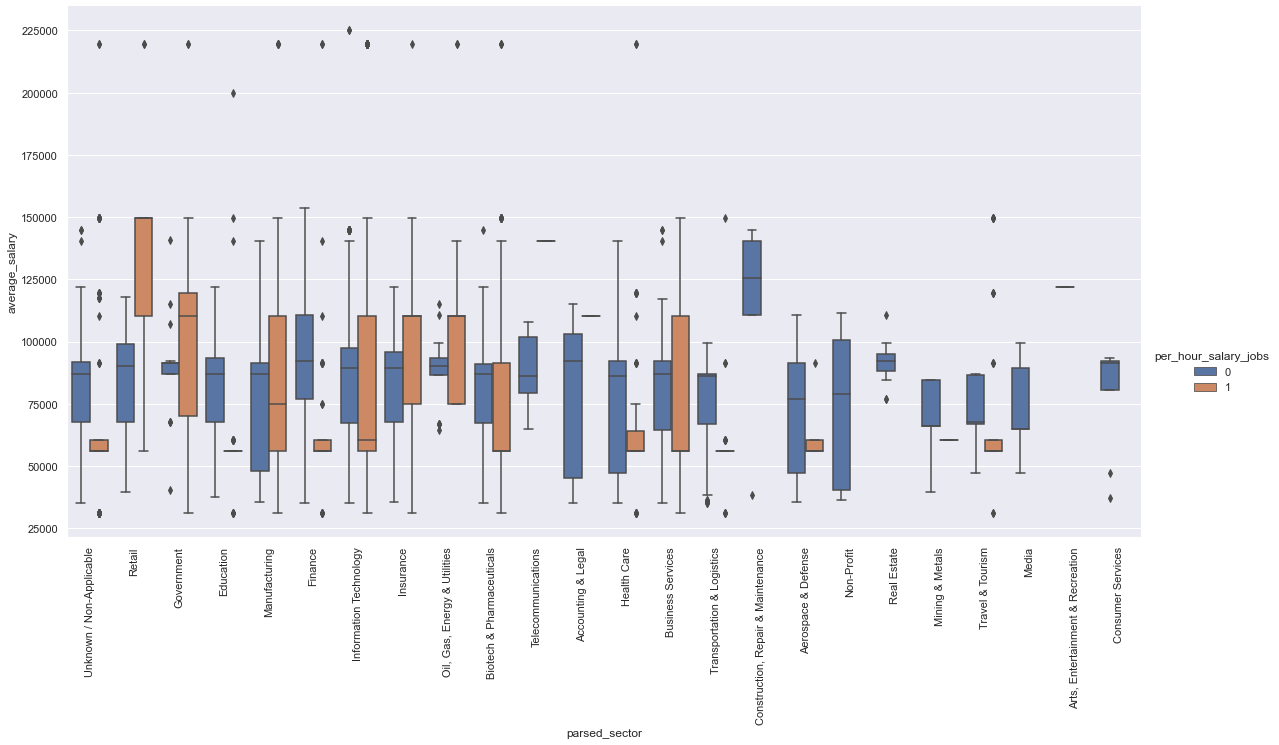

In [211]:
plot_catplot_hue(df, 'parsed_sector', 'average_salary', 'per_hour_salary_jobs', kind='box', xaxis_width=8)

# Numerical Data

In [17]:
df.columns

Index(['Revenue', 'Company Name', 'parsed_sector', 'states',
       'parsed_type_of_ownership', 'Industry', 'parsed_job_title',
       'parsed_founded', 'Rating', 'description_length', 'Size',
       'per_hour_salary_jobs', 'fixed_salary_jobs', 'average_salary'],
      dtype='object')

In [18]:
def plot_histogram(dataset, xaxis, width=0, height=0, kde=False, bins='auto', change_plot_size=False):
    
    if change_plot_size:
        sns.set(rc={'figure.figsize': (width, height)})
    
    sns.histplot(dataset[xaxis], kde=kde, bins=bins)
    

def plot_boxplot_numeric(dataset, x_axis, width=0, height=0, change_plot_size=False):
    
    if change_plot_size:
        sns.set(rc={'figure.figsize': (width, height)})
    
    sns.boxplot(data=dataset, x=x_axis)

## Historgrams

### Average Salary

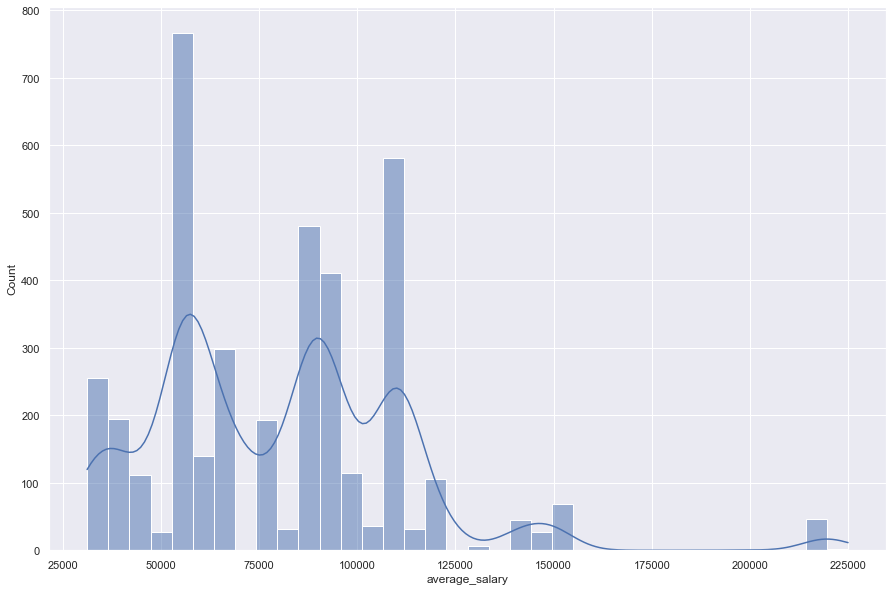

In [19]:
plot_histogram(df, 'average_salary', kde=True, width=15, height=10, change_plot_size=True)

### Description Length

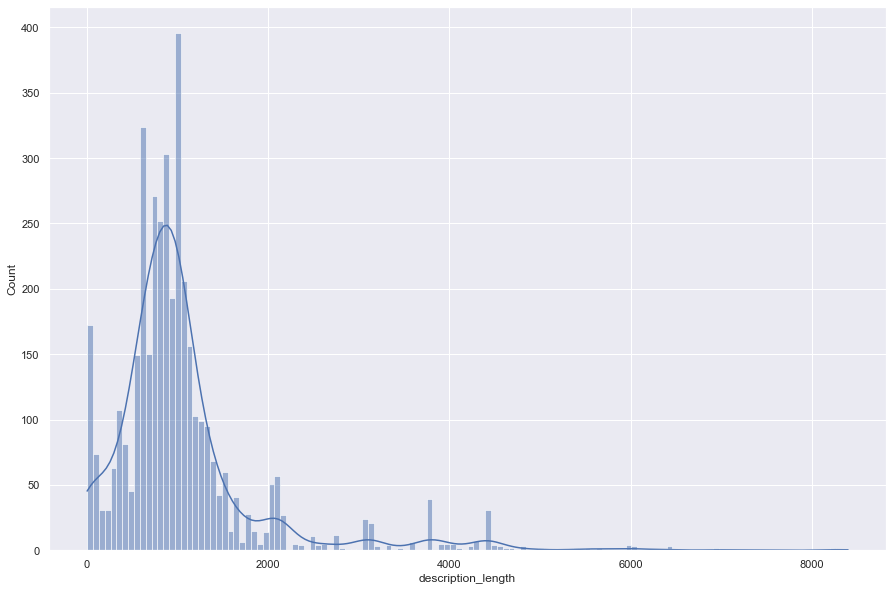

In [20]:
plot_histogram(df, 'description_length', kde=True, change_plot_size=True, width=15, height=10)

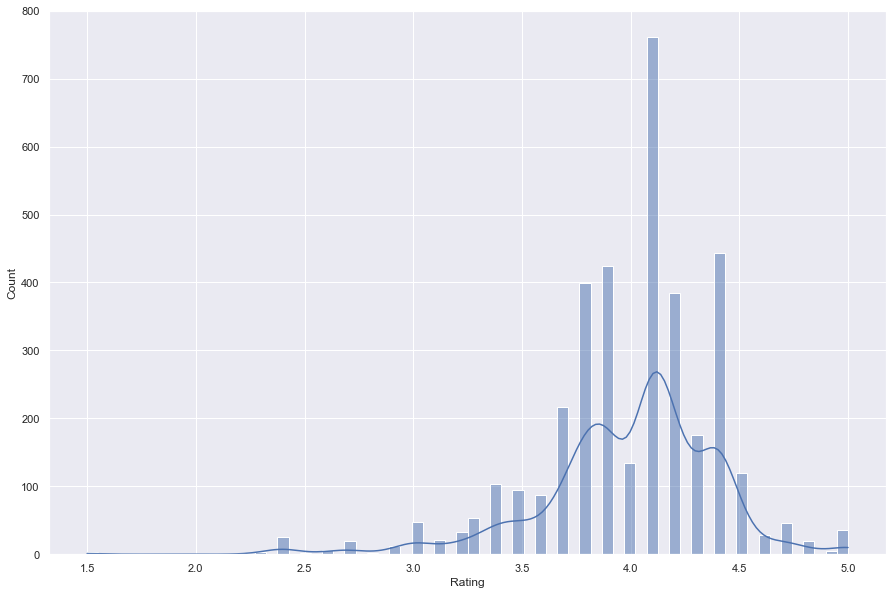

In [21]:
plot_histogram(df, 'Rating', kde=True)

In [22]:
df.columns

Index(['Revenue', 'Company Name', 'parsed_sector', 'states',
       'parsed_type_of_ownership', 'Industry', 'parsed_job_title',
       'parsed_founded', 'Rating', 'description_length', 'Size',
       'per_hour_salary_jobs', 'fixed_salary_jobs', 'average_salary'],
      dtype='object')

## Boxplots

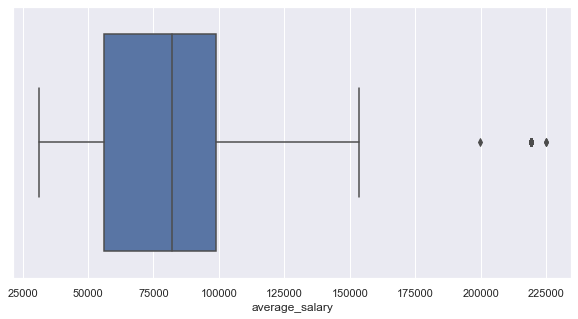

In [23]:
plot_boxplot_numeric(df, 'average_salary', change_plot_size=True, width=10, height=5)

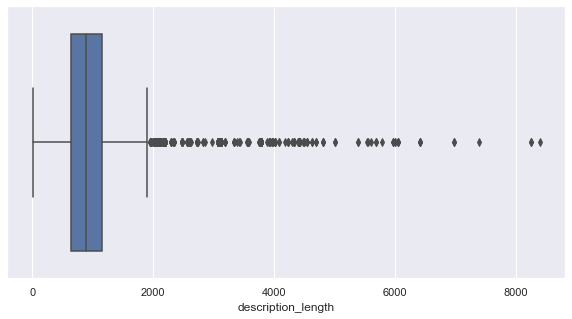

In [24]:
plot_boxplot_numeric(df, 'description_length')

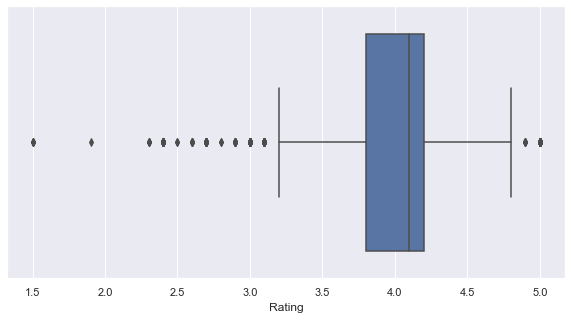

In [25]:
plot_boxplot_numeric(df, 'Rating')

In [26]:
df.dtypes


Revenue                      object
Company Name                 object
parsed_sector                object
states                       object
parsed_type_of_ownership     object
Industry                     object
parsed_job_title             object
parsed_founded              float64
Rating                      float64
description_length            int64
Size                         object
per_hour_salary_jobs          int64
fixed_salary_jobs             int64
average_salary              float64
dtype: object

# Correalation

In [27]:
def plot_heatmap(dataset, width=0, height=0, change_plot_size=False):
    
    if change_plot_size:
        sns.set(rc={'figure.figsize': (width, height)})
        
    sns.heatmap(dataset.corr(), annot=True, linewidths=2)

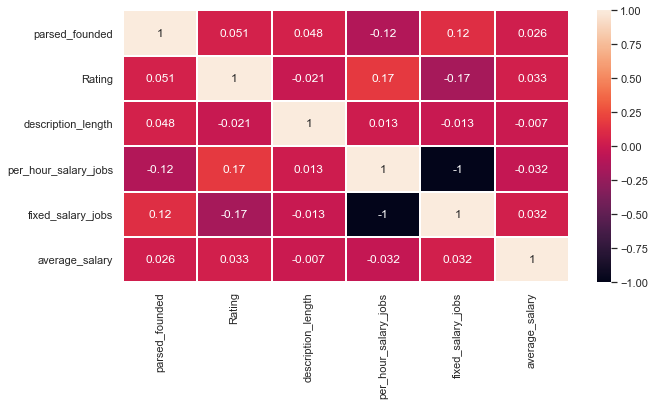

In [28]:
plot_heatmap(df) # fixed_salary_jobs and per_hour_jobs have strong negative correlation. It makes sense beacuse when fixed_salary_jobs is 0 then per_hour_jobs is 1 and vice versa.

In [29]:
df.columns

Index(['Revenue', 'Company Name', 'parsed_sector', 'states',
       'parsed_type_of_ownership', 'Industry', 'parsed_job_title',
       'parsed_founded', 'Rating', 'description_length', 'Size',
       'per_hour_salary_jobs', 'fixed_salary_jobs', 'average_salary'],
      dtype='object')

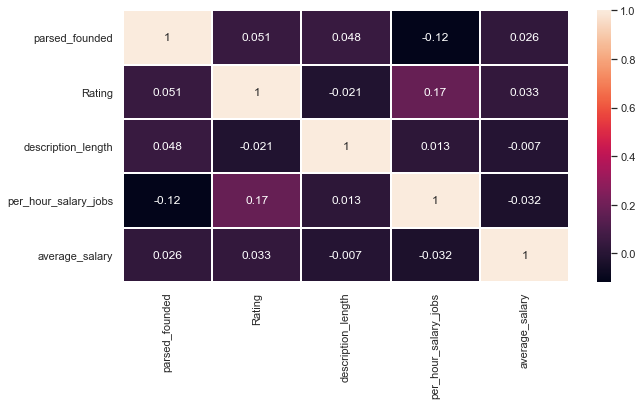

In [30]:
plot_heatmap(df[['Revenue', 'Company Name', 'parsed_sector', 'states',
       'parsed_type_of_ownership', 'Industry', 'parsed_job_title',
       'parsed_founded', 'Rating', 'description_length', 'Size',
       'per_hour_salary_jobs','average_salary']])

In [31]:
dataset['Job Description'].dtypes

dtype('O')

In [32]:
dataset['Job Description'].apply(str)

0       Responsibilities:\n· Provides plan with data, ...
1       What you'll do...\nData Scientists in Walmart ...
2       Duties\nSummary\nClick on "" button below to v...
3       About the Position\nWe’ve been creating except...
4       Data Scientists in Global Tech – Sam’s Technol...
5       Who We Are\nCollaborative. Respectful. A place...
6       Who We Are\nCollaborative. Respectful. A place...
7       What We'll Bring:\nAt TransUnion, we have a we...
8       This role works within the organization and wi...
9       At the Web Data team we're looking for a passi...
10      Avail is a car sharing service to help people ...
11      Minimum qualifications:\nBachelor's degree in ...
12      As an employer, we foster an exciting culture ...
13      Content Developer, Microsoft Machine Learning ...
14      Organization and Job ID\nJob ID: 312324\nDirec...
15      2+ years of non-internship professional softwa...
16      Los Angeles, California\nData Science and Engi...
17      Execut

In [33]:
dataset['Job Description'].dtypes

dtype('O')

# Word Cloud

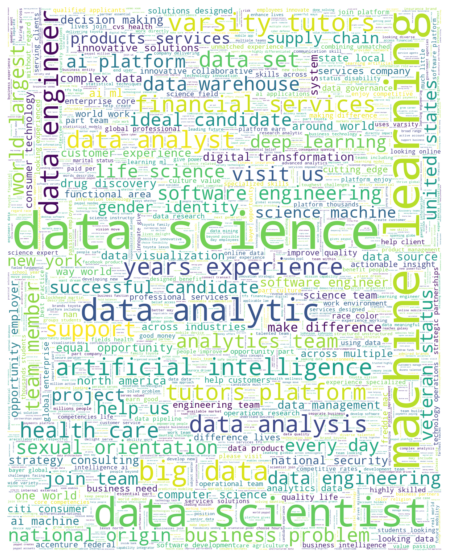

In [34]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

words = ' '.join(dataset['Job Description'].apply(lambda x: str(x))) # joining every job description as one huge paragraph.
words = words.replace('\n', '')

def wordCloud(text):
    
    filtered = []
    stop_words = set(stopwords.words('english')) # English words which does not add much meaning to a sentence
#     print(stop_words)
    word_tokens = word_tokenize(text) # The process of splitting a large sample of text into words
#     print(word_tokens)
    
    for w in word_tokens:
        if w not in stop_words and w.isalpha(): # isaplha() returns true if the word is only of alphabets.
            filtered.append(w.lower())
#         else:
#             print(w)
    
    return filtered
    
    
words_filtered = wordCloud(words)

text = " ".join([element for element in words_filtered])

wc = WordCloud(background_color='white', random_state=1, stopwords=STOPWORDS, max_words=2000, width=1200, height=1500)
wc.generate(text)


plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Expoting Dataset

In [35]:
df.to_csv('EDA_data.csv')